Hasil Rapih LSTM

In [ ]:
pip install yfinance --upgrade --no-cache-dir

Yang diambil SIDO.JK, BBCA.JK, UNVR.JK


Cara pengambilan dataframe dari ke 3 perusahaan saham tersebut

Ini bagian rapihin:

In [ ]:
pip install yfinance --upgrade --no-cache-dir

#Persiapan
import yfinance as yf
import pandas as pd

data_unilever=yf.download("UNVR.JK")
data_sidomuncul=yf.download("SIDO.JK")
data_BCA=yf.download("BBCA.JK")

  #Data Cleansing

print(data_unilever["Close"].isnull().value_counts(),"\n")

print(data_sidomuncul["Close"].isnull().value_counts(),"\n")

print(data_BCA["Close"].isnull().value_counts(),"\n")

data_BCA=data_BCA.dropna()

print(data_BCA["Close"].isnull().value_counts(),"\n")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-09-03,615.0,675.0,605.0,675.0,383.379364,43162500
2003-09-04,690.0,750.0,675.0,685.0,389.059082,82850000
2003-09-05,685.0,700.0,680.0,690.0,391.898926,24055000
2003-09-08,690.0,690.0,665.0,680.0,386.219208,18007500
2003-09-09,680.0,680.0,660.0,665.0,377.699677,14075000
...,...,...,...,...,...,...
2022-04-18,3400.0,3440.0,3370.0,3390.0,3390.000000,10009100
2022-04-19,3390.0,3410.0,3350.0,3350.0,3350.000000,13023000
2022-04-20,3390.0,3510.0,3370.0,3470.0,3470.000000,29867500


Cleansing data

In [ ]:
print(data_unilever["Close"].isnull().value_counts(),"\n")

print(data_sidomuncul["Close"].isnull().value_counts(),"\n")

print(data_BCA["Close"].isnull().value_counts(),"\n")

False    4639
Name: Close, dtype: int64 

False    2072
Name: Close, dtype: int64 

False    4440
True        1
Name: Close, dtype: int64 



In [ ]:
data_BCA=data_BCA.dropna()

print(data_BCA["Close"].isnull().value_counts(),"\n")

False    4440
Name: Close, dtype: int64 



Ploting data eksaknya

In [ ]:
#from importlib import reload
#reload(plt)
#plt.xlabel("Hello World")

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(data_unilever["Close"], color="Green", label="Ini plot unilever")
plt.xlabel("Waktu")
plt.ylabel("Harga saham Closing")
plt.legend()
plt.show()

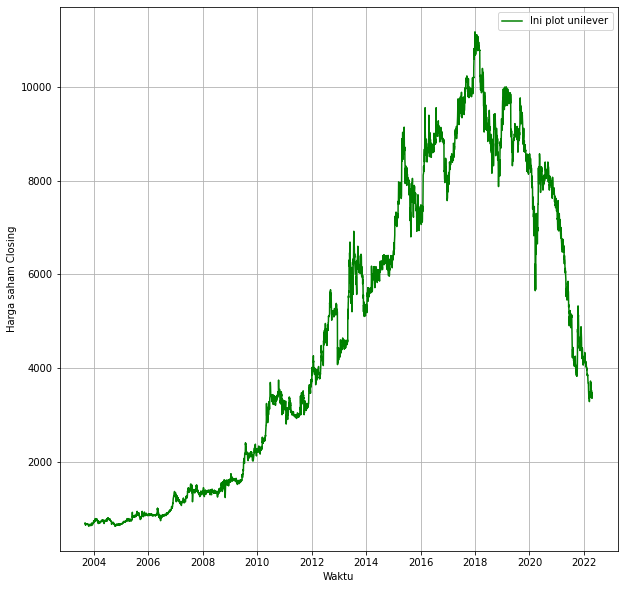

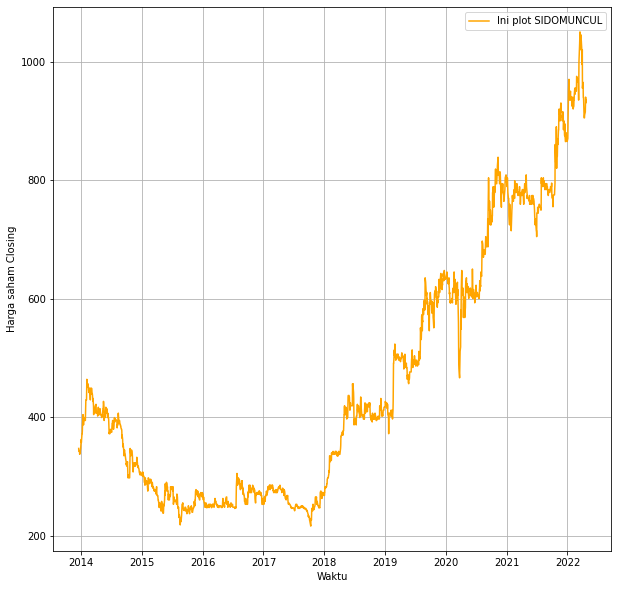

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(data_sidomuncul["Close"], color="orange", label="Ini plot SIDOMUNCUL")
plt.xlabel("Waktu")
plt.ylabel("Harga saham Closing")
plt.legend()
plt.show()

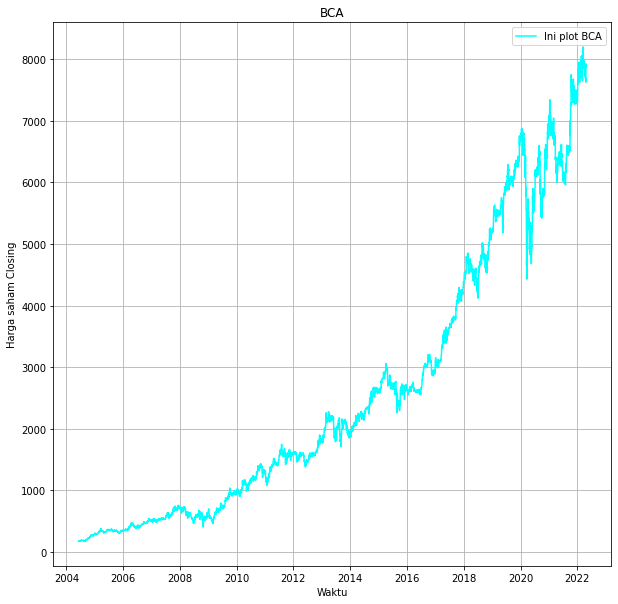

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(data_BCA["Close"], color="cyan", label="Ini plot BCA")
plt.title('BCA')
plt.xlabel("Waktu")
plt.ylabel("Harga saham Closing")
plt.legend()
plt.show()

Pemodelan LSTMnya

Model LSTM Unilever

Epoch 1/5
144/144 [==============================] - 18s 87ms/step - loss: 0.0125
Epoch 2/5
144/144 [==============================] - 14s 96ms/step - loss: 0.0027
Epoch 3/5
144/144 [==============================] - 13s 87ms/step - loss: 0.0026
Epoch 4/5
144/144 [==============================] - 13s 87ms/step - loss: 0.0022
Epoch 5/5
144/144 [==============================] - 13s 87ms/step - loss: 0.0021
[*********************100%***********************]  1 of 1 completed


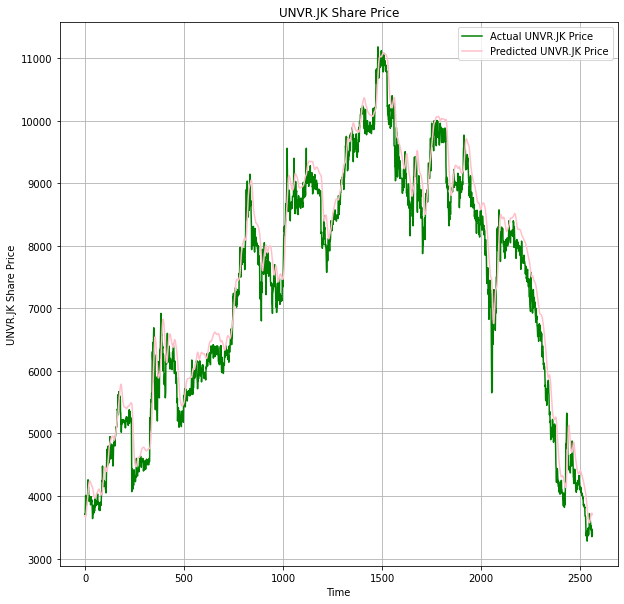

Maka hasil forecasting saham untuk tanggal ke	 2022-04-23 	adalah: 
ini adalah hasil prediksinya [[3689.0017]] 
Dimana RMSEnya adalah: 374.0817302818566


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#untuk load data saham (ticker)
company='UNVR.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()#+dt.timedelta(days=1)#Days bisa digant bersesuaian


#Import DataFrame
data = data_unilever


#mempersiapkan datanya
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data["Close"].values.reshape(-1,1))

#Prediksi forecasting berdasarkan 60 hari sebelumnya
prediction_days=60


#list untuk hasil training
x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train= np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


#membuat model
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))                                    

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))#prediction untuk next closenya

#============================================================       
model.compile(optimizer="adam", loss= "mean_squared_error")
model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


#test model akurasi dari data yang dipunya
#load test datanya

test_data=yf.download(company, start,end)
test_data=test_data.dropna()
actual_prices=test_data["Close"].values

total_dataset=pd.concat((data["Close"], test_data["Close"]), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


#hasil dari prediction dari test data
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



#Plotting test prediksinya dan eksaknya
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(actual_prices, color="green", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="pink", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()
#=================================================================
from sklearn.metrics import mean_squared_error
import numpy as np

rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))

#Memprediksi saham sekian hari kedepan
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("Maka hasil forecasting saham untuk tanggal ke\t",dt.date.today()+dt.timedelta(days=1),"\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
      "\nDimana RMSEnya adalah:", rmse)


In [ ]:
tabel baru= eksak, prediksi

Model LSTM BBCA

Epoch 1/25
135/135 [==============================] - 33s 172ms/step - loss: 0.0094
Epoch 2/25
135/135 [==============================] - 23s 172ms/step - loss: 0.0019
Epoch 3/25
135/135 [==============================] - 23s 171ms/step - loss: 0.0018
Epoch 4/25
135/135 [==============================] - 23s 172ms/step - loss: 0.0016
Epoch 5/25
135/135 [==============================] - 23s 173ms/step - loss: 0.0016
Epoch 6/25
135/135 [==============================] - 23s 171ms/step - loss: 0.0014
Epoch 7/25
135/135 [==============================] - 23s 173ms/step - loss: 0.0012
Epoch 8/25
135/135 [==============================] - 23s 172ms/step - loss: 0.0012
Epoch 9/25
135/135 [==============================] - 23s 172ms/step - loss: 0.0014
Epoch 10/25
135/135 [==============================] - 23s 173ms/step - loss: 0.0011
Epoch 11/25
135/135 [==============================] - 23s 172ms/step - loss: 0.0010
Epoch 12/25
135/135 [==============================] - 23s 171ms/step - lo

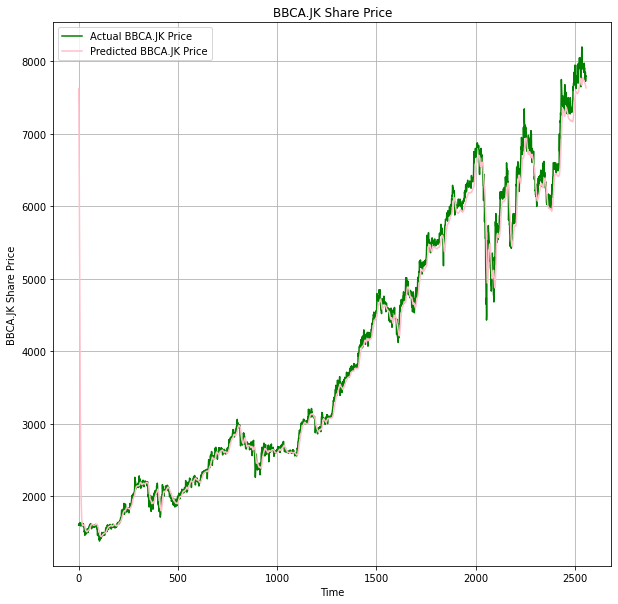

Maka hasil forecasting saham untuk tanggal ke	 2022-04-15 	adalah: 
ini adalah hasil prediksinya [[7620.3037]] 
Dimana RMSEnya adalah: 296.48940173439394


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()#+dt.timedelta(days=1)#Days bisa digant bersesuaian


#Import DataFrame
data = data_BCA


#mempersiapkan datanya
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data["Close"].values.reshape(-1,1))

#Prediksi forecasting berdasarkan 60 hari sebelumnya
prediction_days=120


#list untuk hasil training
x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train= np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


#membuat model
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))                                    

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))#prediction untuk next closenya

#============================================================
model.compile(optimizer="adam", loss= "mean_squared_error")
model.fit(x_train, y_train, epochs=25, batch_size=32)#nanti epochs balikin ke 25


#test model akurasi dari data yang dipunya
#load test datanya

test_data=yf.download(company, start,end)
test_data=test_data.dropna()
actual_prices=test_data["Close"].values

total_dataset=pd.concat((data["Close"], test_data["Close"]), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


#hasil dari prediction dari test data
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



#Plotting test prediksinya dan eksaknya
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(actual_prices, color="green", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="pink", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()
#===============================================================================
from sklearn.metrics import mean_squared_error
import numpy as np

rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))



#Memprediksi saham sekian hari kedepan
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("Maka hasil forecasting saham untuk tanggal ke\t",dt.date.today()+dt.timedelta(days=1),"\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
      "\nDimana RMSEnya adalah:", rmse)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()#+dt.timedelta(days=1)#Days bisa digant bersesuaian


#Import DataFrame
data = data_BCA


#mempersiapkan datanya
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data["Close"].values.reshape(-1,1))

#Prediksi forecasting berdasarkan 60 hari sebelumnya
prediction_days=120


#list untuk hasil training
x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train= np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


#membuat model
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))                                    

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))#prediction untuk next closenya

#============================================================
model.compile(optimizer="adam", loss= "mean_squared_error")
model.fit(x_train, y_train, epochs=5, batch_size=64)#nanti epochs balikin ke 25


#test model akurasi dari data yang dipunya
#load test datanya

test_data=yf.download(company, start,end)
test_data=test_data.dropna()
actual_prices=test_data["Close"].values

total_dataset=pd.concat((data["Close"], test_data["Close"]), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


#hasil dari prediction dari test data
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



#Plotting test prediksinya dan eksaknya
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(actual_prices, color="green", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="pink", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()
#===============================================================================
from sklearn.metrics import mean_squared_error
import numpy as np

rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))



#Memprediksi saham sekian hari kedepan
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("Maka hasil forecasting saham untuk tanggal ke\t",dt.date.today()+dt.timedelta(days=1),"\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
      "\nDimana RMSEnya adalah:", rmse)


In [ ]:
BBCA BARUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU

Epoch 1/25
137/137 [==============================] - 17s 85ms/step - loss: 0.0083
Epoch 2/25
137/137 [==============================] - 15s 107ms/step - loss: 0.0018
Epoch 3/25
137/137 [==============================] - 18s 131ms/step - loss: 0.0019
Epoch 4/25
137/137 [==============================] - 12s 90ms/step - loss: 0.0015
Epoch 5/25
137/137 [==============================] - 14s 99ms/step - loss: 0.0014
Epoch 6/25
137/137 [==============================] - 15s 112ms/step - loss: 0.0014
Epoch 7/25
137/137 [==============================] - 12s 85ms/step - loss: 0.0013
Epoch 8/25
137/137 [==============================] - 15s 108ms/step - loss: 0.0013
Epoch 9/25
137/137 [==============================] - 15s 113ms/step - loss: 0.0011
Epoch 10/25
137/137 [==============================] - 14s 100ms/step - loss: 0.0011
Epoch 11/25
137/137 [==============================] - 11s 83ms/step - loss: 0.0011
Epoch 12/25
137/137 [==============================] - 11s 83ms/step - loss: 0.

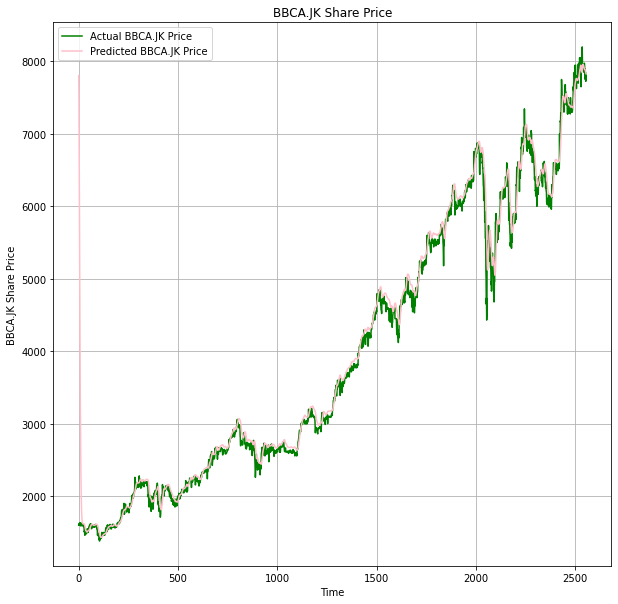

Maka hasil forecasting saham untuk tanggal ke	 2022-04-14 	adalah: 
ini adalah hasil prediksinya [[7816.318]] 
Dimana RMSEnya adalah: 298.41595671456537


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()#+dt.timedelta(days=1)#Days bisa digant bersesuaian


#Import DataFrame
data = data_BCA


#mempersiapkan datanya
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data["Close"].values.reshape(-1,1))

#Prediksi forecasting berdasarkan 60 hari sebelumnya
prediction_days=60


#list untuk hasil training
x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train= np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


#membuat model
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))                                    

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))#prediction untuk next closenya

#============================================================
model.compile(optimizer="adam", loss= "mean_squared_error")
model.fit(x_train, y_train, epochs=25, batch_size=32)#nanti epochs balikin ke 25


#test model akurasi dari data yang dipunya
#load test datanya

test_data=yf.download(company, start,end)
test_data=test_data.dropna()
actual_prices=test_data["Close"].values

total_dataset=pd.concat((data["Close"], test_data["Close"]), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


#hasil dari prediction dari test data
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



#Plotting test prediksinya dan eksaknya
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(actual_prices, color="green", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="pink", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()
#===============================================================================
from sklearn.metrics import mean_squared_error
import numpy as np

rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))



#Memprediksi saham sekian hari kedepan
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("Maka hasil forecasting saham untuk tanggal ke\t",dt.date.today()+dt.timedelta(days=1),"\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
      "\nDimana RMSEnya adalah:", rmse)


Model LSTM untuk Sidomuncul

Epoch 1/25
63/63 [==============================] - 11s 85ms/step - loss: 0.0128
Epoch 2/25
63/63 [==============================] - 5s 83ms/step - loss: 0.0024
Epoch 3/25
63/63 [==============================] - 5s 83ms/step - loss: 0.0023
Epoch 4/25
63/63 [==============================] - 5s 82ms/step - loss: 0.0023
Epoch 5/25
63/63 [==============================] - 5s 84ms/step - loss: 0.0023
Epoch 6/25
63/63 [==============================] - 5s 83ms/step - loss: 0.0020
Epoch 7/25
63/63 [==============================] - 5s 84ms/step - loss: 0.0017
Epoch 8/25
63/63 [==============================] - 5s 83ms/step - loss: 0.0017
Epoch 9/25
63/63 [==============================] - 5s 82ms/step - loss: 0.0016
Epoch 10/25
63/63 [==============================] - 5s 83ms/step - loss: 0.0016
Epoch 11/25
63/63 [==============================] - 5s 83ms/step - loss: 0.0016
Epoch 12/25
63/63 [==============================] - 5s 84ms/step - loss: 0.0017
Epoch 13/25
63/63 [=================

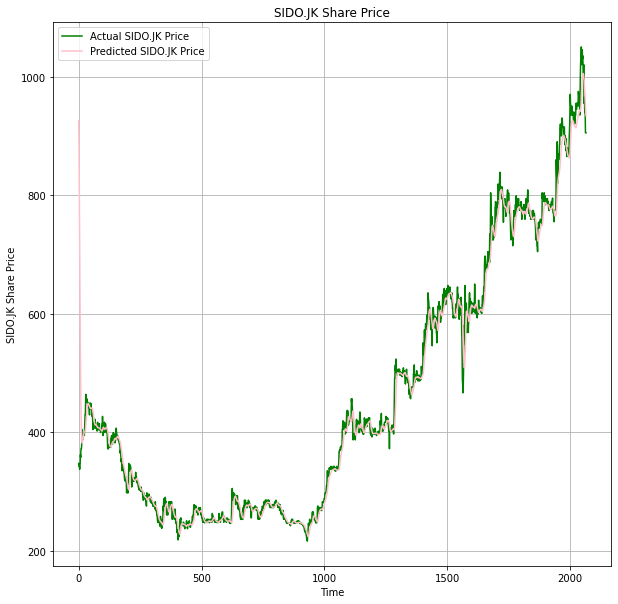

Maka hasil forecasting saham untuk tanggal ke	 2022-04-14 	adalah: 
ini adalah hasil prediksinya [[925.62836]] 
Dimana RMSEnya adalah: 32.05725983200091


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()+dt.timedelta(days=1)#Days bisa digant bersesuaian


#Import DataFrame
data = data_sidomuncul


#mempersiapkan datanya
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data["Close"].values.reshape(-1,1))

#Prediksi forecasting berdasarkan 60 hari sebelumnya
prediction_days=60


#list untuk hasil training
x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train= np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


#membuat model
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))                                    

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))#prediction untuk next closenya

#============================================================        
model.compile(optimizer="adam", loss= "mean_squared_error")
model.fit(x_train, y_train, epochs=25, batch_size=32)#nanti epochs balikin ke 25


#test model akurasi dari data yang dipunya
#load test datanya

test_data=yf.download(company, start,end)
test_data=test_data.dropna()
actual_prices=test_data["Close"].values

total_dataset=pd.concat((data["Close"], test_data["Close"]), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


#hasil dari prediction dari test data
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



#Plotting test prediksinya dan eksaknya
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(actual_prices, color="green", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="pink", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()
#===============================================================================
from sklearn.metrics import mean_squared_error
import numpy as np

rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))


#Memprediksi saham sekian hari kedepan
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("Maka hasil forecasting saham untuk tanggal ke\t",dt.date.today()+dt.timedelta(days=1),"\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
      "\nDimana RMSEnya adalah:", rmse)



In [ ]:
data_unilever=yf.download("UNVR.JK")
data_sidomuncul=yf.download("SIDO.JK")
data_BCA=yf.download("BBCA.JK")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# ======== ARIMA ========

In [ ]:
pip install yfinance

### ARIMA untuk BCA

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



Prediksi Harga Saham Besok:  7799.7260570331155

RMSE =  65.79750045653665 

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4433
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -23736.875
Method:                       css-mle   S.D. of innovations             51.195
Date:                Wed, 13 Apr 2022   AIC                          47481.751
Time:                        15:24:56   BIC                          47507.338
Sample:                             1   HQIC                         47490.773
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7195      0.693      2.482      0.013       0.362       3.077
ar.L1.D.y     -0.0807      0.015     -5.378      0.00

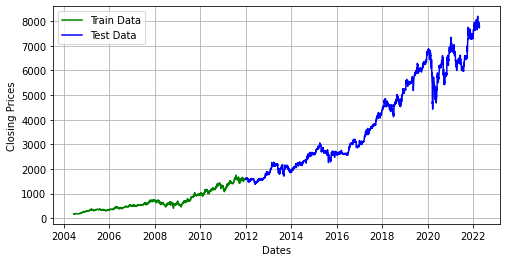

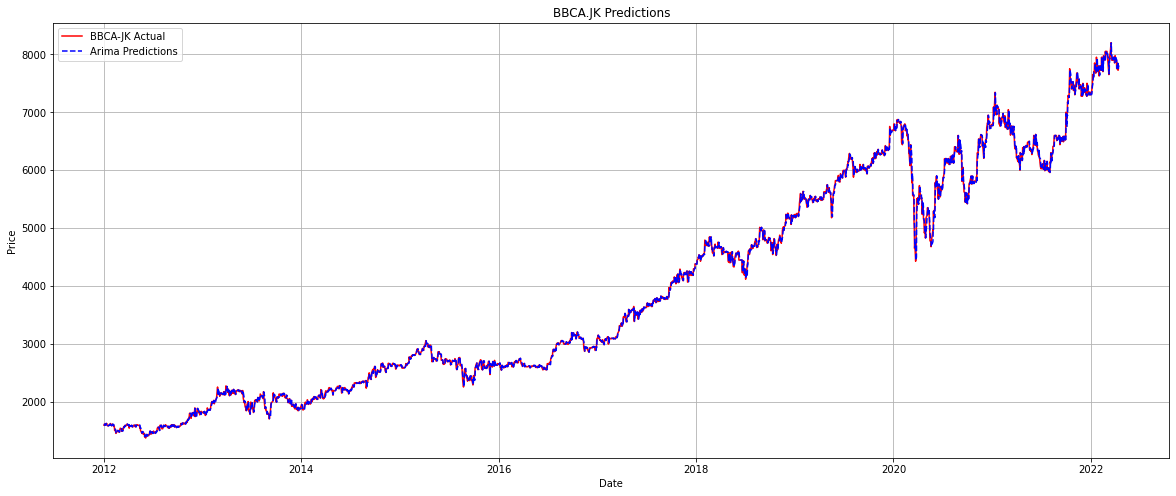

In [ ]:
import yfinance as yf

df = yf.download('bbca.jk')
df = df.dropna()

import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error, mean_absolute_error

#plt.figure(figsize = (10, 4))
#plt.plot(df.index, df['Close'])
#plt.show()

to_row = int(len(df)*0.9)

training_data = list(df[:'2012-01-01']['Close'])
testing_data = list(df['2012-01-01':]['Close'])

#print(len(training_data))
#print(len(testing_data))

plt.figure(figsize = (8,4))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[:'2012-01-01']['Close'], 'green', label = 'Train Data')
plt.plot(df['2012-01-01':]['Close'], 'blue', label = 'Test Data')
plt.legend()

model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
  model=ARIMA(training_data, order = (2,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)

  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

#print(len(testing_data))
#print(len(model_predictions))

#print(len(training_data))
#print(len(df))

model = ARIMA(training_data, order = (2,1,0))
model_fit = model.fit()
tomorrow_predictions = model_fit.forecast()[0][0]

print("\nPrediksi Harga Saham Besok: ", tomorrow_predictions)

from sklearn.metrics import mean_squared_error

print("\nRMSE = ", np.sqrt(mean_squared_error(testing_data, model_predictions)),"\n")

print(model_fit.summary())

plt.figure(figsize = (20,8))
plt.grid(True)

date_range = df['2012-01-01':].index

plt.plot(date_range, testing_data, color = 'red', label = 'BBCA-JK Actual')
plt.plot(date_range, model_predictions, color = 'blue', linestyle = 'dashed', label = 'Arima Predictions')

plt.title('BBCA.JK Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### ARIMA untuk UNVR

In [ ]:
import yfinance as yf

df = yf.download('unvr.jk')
df = df.dropna()

import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error, mean_absolute_error

#plt.figure(figsize = (10, 4))
#plt.plot(df.index, df['Close'])
#plt.show()

to_row = int(len(df)*0.9)

training_data = list(df[:'2012-01-01']['Close'])
testing_data = list(df['2012-01-01':]['Close'])

#print(len(training_data))
#print(len(testing_data))

plt.figure(figsize = (8,4))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[:'2012-01-01']['Close'], 'green', label = 'Train Data')
plt.plot(df['2012-01-01':]['Close'], 'blue', label = 'Test Data')
plt.legend()

model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
  model=ARIMA(training_data, order = (2,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)

  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

#print(len(testing_data))
#print(len(model_predictions))

#print(len(training_data))
#print(len(df))

model = ARIMA(training_data, order = (2,1,0))
model_fit = model.fit()
tomorrow_predictions = model_fit.forecast()[0][0]

print("\nPrediksi Harga Saham Besok: ", tomorrow_predictions)

from sklearn.metrics import mean_squared_error

print("\nRMSE = ", np.sqrt(mean_squared_error(testing_data, model_predictions)),"\n")

print(model_fit.summary())

plt.figure(figsize = (20,8))
plt.grid(True)

date_range = df['2012-01-01':].index

plt.plot(date_range, testing_data, color = 'red', label = 'UNVR-JK Actual')
plt.plot(date_range, model_predictions, color = 'blue', linestyle = 'dashed', label = 'Arima Predictions')

plt.title('UNVR.JK Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### ARIMA untuk SIDO

In [ ]:
import yfinance as yf

df = yf.download('sido.jk')
df = df.dropna()

import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error, mean_absolute_error

#plt.figure(figsize = (10, 4))
#plt.plot(df.index, df['Close'])
#plt.show()

to_row = int(len(df)*0.9)

training_data = list(df[:'2014-01-01']['Close'])
testing_data = list(df['2014-01-01':]['Close'])

#print(len(training_data))
#print(len(testing_data))

plt.figure(figsize = (8,4))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[:'2014-01-01']['Close'], 'green', label = 'Train Data')
plt.plot(df['2014-01-01':]['Close'], 'blue', label = 'Test Data')
plt.legend()

model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
  model=ARIMA(training_data, order = (2,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)

  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

#print(len(testing_data))
#print(len(model_predictions))

#print(len(training_data))
#print(len(df))

model = ARIMA(training_data, order = (2,1,0))
model_fit = model.fit()
tomorrow_predictions = model_fit.forecast()[0][0]

print("\nPrediksi Harga Saham Besok: ", tomorrow_predictions)

from sklearn.metrics import mean_squared_error

print("\nRMSE = ", np.sqrt(mean_squared_error(testing_data, model_predictions)),"\n")

print(model_fit.summary())

plt.figure(figsize = (16,8))
plt.grid(True)

date_range = df['2014-01-01':].index

plt.plot(date_range, testing_data, color = 'red', label = 'SIDO-JK Actual')
plt.plot(date_range, model_predictions, color = 'blue', linestyle = 'dashed', label = 'Arima Predictions')

plt.title('SIDO.JK Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# rapih-rapih lstm 2

Rapih-rapih LSTM 2

In [ ]:
pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 63 kB 36.4 MB/s 
     |████████████████████████████████| 6.4 MB 67.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Ini bagian rapihin:

In [ ]:
#Persiapan
import yfinance as yf
import pandas as pd

data_unilever=yf.download("UNVR.JK")
data_sidomuncul=yf.download("SIDO.JK")
data_BCA=yf.download("BBCA.JK")

  #Data Cleansing

print(data_unilever["Close"].isnull().value_counts(),"\n")

print(data_sidomuncul["Close"].isnull().value_counts(),"\n")

print(data_BCA["Close"].isnull().value_counts(),"\n")

data_BCA=data_BCA.dropna()

print(data_BCA["Close"].isnull().value_counts(),"\n")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
False    4643
Name: Close, dtype: int64 

False    2076
Name: Close, dtype: int64 

False    4444
True        1
Name: Close, dtype: int64 

False    4444
Name: Close, dtype: int64 



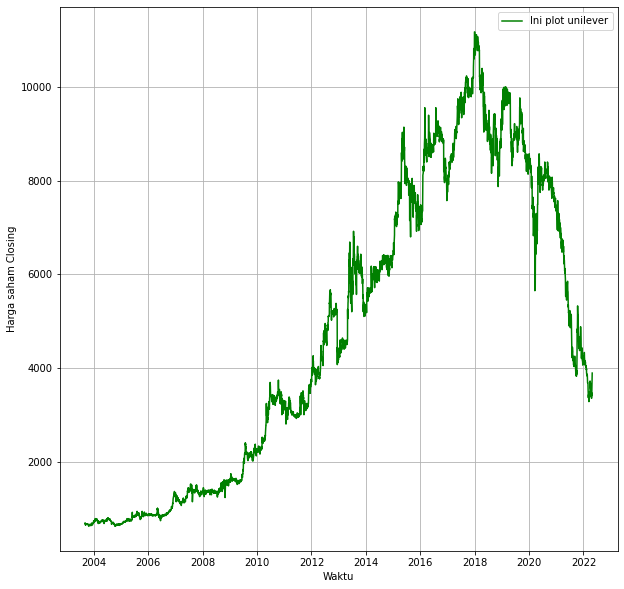

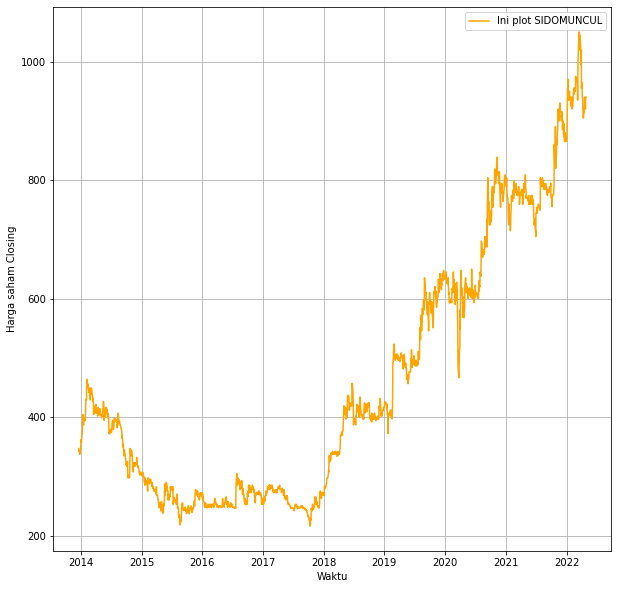

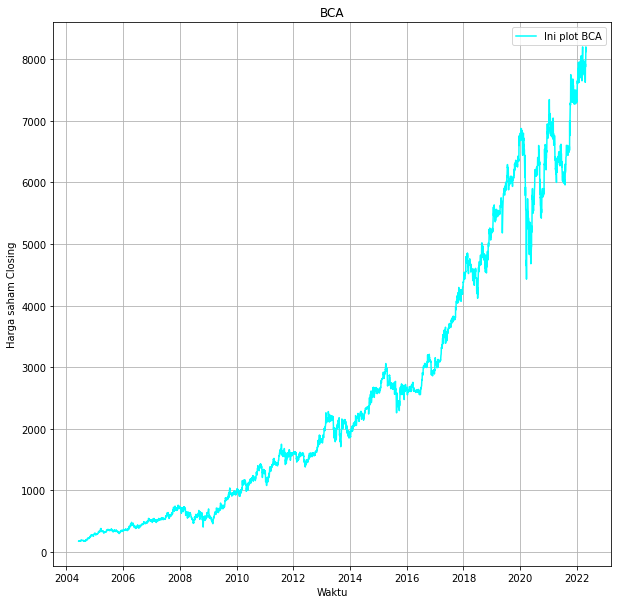

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(data_unilever["Close"], color="Green", label="Ini plot unilever")
plt.xlabel("Waktu")
plt.ylabel("Harga saham Closing")
plt.legend()
plt.show()



plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(data_sidomuncul["Close"], color="orange", label="Ini plot SIDOMUNCUL")
plt.xlabel("Waktu")
plt.ylabel("Harga saham Closing")
plt.legend()
plt.show()



plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(data_BCA["Close"], color="cyan", label="Ini plot BCA")
plt.title('BCA')
plt.xlabel("Waktu")
plt.ylabel("Harga saham Closing")
plt.legend()
plt.show()

dibawah catatan analisis coding

Epoch 1/25
63/63 [==============================] - 10s 75ms/step - loss: 0.0154
Epoch 2/25
63/63 [==============================] - 7s 110ms/step - loss: 0.0023
Epoch 3/25
63/63 [==============================] - 9s 146ms/step - loss: 0.0022
Epoch 4/25
63/63 [==============================] - 11s 179ms/step - loss: 0.0023
Epoch 5/25
63/63 [==============================] - 12s 196ms/step - loss: 0.0020
Epoch 6/25
63/63 [==============================] - 11s 181ms/step - loss: 0.0022
Epoch 7/25
63/63 [==============================] - 12s 183ms/step - loss: 0.0020
Epoch 8/25
63/63 [==============================] - 8s 125ms/step - loss: 0.0018
Epoch 9/25
63/63 [==============================] - 5s 73ms/step - loss: 0.0018
Epoch 10/25
63/63 [==============================] - 5s 74ms/step - loss: 0.0019
Epoch 11/25
63/63 [==============================] - 5s 74ms/step - loss: 0.0017
Epoch 12/25
63/63 [==============================] - 5s 74ms/step - loss: 0.0019
Epoch 13/25
63/63 [======

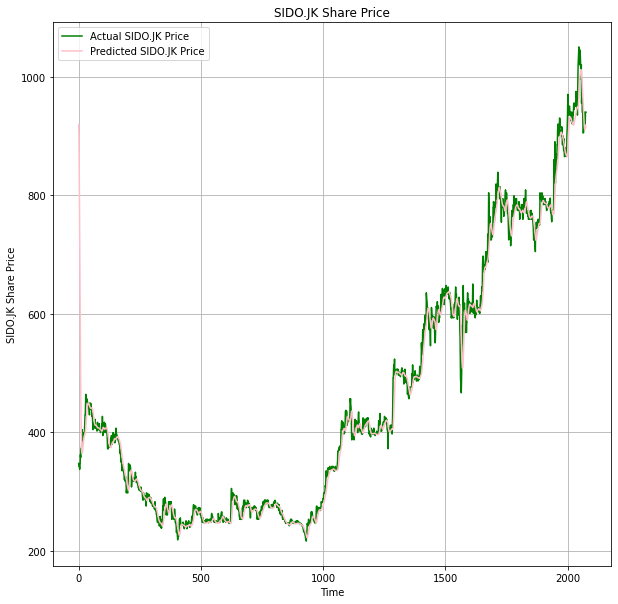

Maka hasil forecasting saham untuk tanggal ke	 2022-05-06 	adalah: 
ini adalah hasil prediksinya [[918.9021]] 
Dimana RMSEnya adalah: 32.55660905263512
Epoch 1/25
63/63 [==============================] - 15s 84ms/step - loss: 0.0180
Epoch 2/25
63/63 [==============================] - 5s 76ms/step - loss: 0.0024
Epoch 3/25
63/63 [==============================] - 5s 76ms/step - loss: 0.0027
Epoch 4/25
63/63 [==============================] - 5s 79ms/step - loss: 0.0025
Epoch 5/25
63/63 [==============================] - 5s 75ms/step - loss: 0.0022
Epoch 6/25
63/63 [==============================] - 5s 75ms/step - loss: 0.0022
Epoch 7/25
63/63 [==============================] - 5s 76ms/step - loss: 0.0022
Epoch 8/25
63/63 [==============================] - 5s 75ms/step - loss: 0.0020
Epoch 9/25
63/63 [==============================] - 5s 75ms/step - loss: 0.0019
Epoch 10/25
63/63 [==============================] - 5s 75ms/step - loss: 0.0016
Epoch 11/25
63/63 [===========================

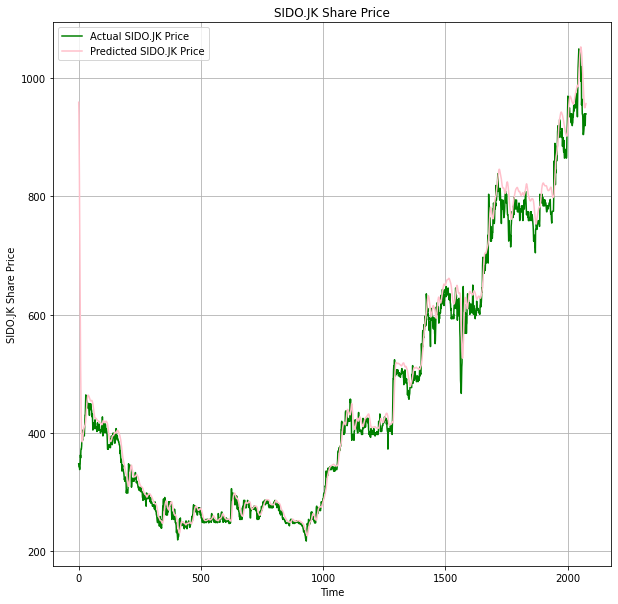

Maka hasil forecasting saham untuk tanggal ke	 2022-05-06 	adalah: 
ini adalah hasil prediksinya [[959.6166]] 
Dimana RMSEnya adalah: 36.274475082785436


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)

#WHILE
end=dt.date.today()+dt.timedelta(days=1)#Days bisa digant bersesuaian


#Import DataFrame
data = data_sidomuncul


#mempersiapkan datanya
scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
scaled_data=scaler.fit_transform(data["Close"].values.reshape(-1,1))

#Prediksi forecasting berdasarkan 60 hari sebelumnya????
prediction_days=60


#list untuk hasil training
x_train=[]#kayaknya ini
y_train=[]

#kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train= np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


#membuat model
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))                                    

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))#prediction untuk next closenya

#============================================================        
model.compile(optimizer="adam", loss= "mean_squared_error")
model.fit(x_train, y_train, epochs=25, batch_size=32)#nanti epochs balikin ke 25


#test model akurasi dari data yang dipunya
#load test datanya
#===================================================== ada catatan di bawah:
test_data=data#yf.download(company, start,end)
test_data=test_data.dropna()
actual_prices=test_data["Close"].values

#bagian concatnya keknya rada-rada...
total_dataset=pd.concat((data["Close"], test_data["Close"]), axis=0)

#ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
#beigtu juga pada model_inputs
#dibagian total_dataset, langsung aja pake len(test_data)


model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)
#=====================================================

#hasil dari prediction dari test data
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



#Plotting test prediksinya dan eksaknya
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(actual_prices, color="green", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="pink", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()
#===============================================================================
from sklearn.metrics import mean_squared_error
import numpy as np

rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))


#Memprediksi saham sekian hari kedepan
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("Maka hasil forecasting saham untuk tanggal ke\t",dt.date.today()+dt.timedelta(days=1),"\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
      "\nDimana RMSEnya adalah:", rmse)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK

#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

error_tolenransi=0.04#0.031983333
pajak_beli=0.0019
pajak_jual=0.0039

list_banyak_error_toleransi=[0]

lompatan=1

harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]
while lompatan<11:
  end=dt.date.today()+dt.timedelta(days=lompatan)#Days bisa digant bersesuaian

  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size) #ini banyak hari untuk testing data
    #ini tadinya 60 hari


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=3, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction = model.predict(real_data)
  prediction = scaler.inverse_transform(prediction)
  print("Maka hasil forecasting saham untuk ke\t",dt.date.today()+dt.timedelta(days=lompatan),\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
        "\nDimana RMSEnya adalah:", rmse, "\n")
  
  data_close.loc[len(data_close.index)] = prediction

  print(data_close.iloc[len(data_close.index)-2], f"harga saat hari ke: {lompatan-1}\n")
  print(data_close.iloc[len(data_close.index)-1], f"harga saat hari ke: {lompatan}\n")

  keadaan_saham_error=abs(data_close.iloc[len(data_close.index)-2] - data_close.iloc[len(data_close.index)-1])/data_close.iloc[len(data_close.index)-2]
  #harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]
  
  if lompatan>1:
    if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
      #if keadaan_saham_error > error_tolenransi:
      harga_jual_saham=data_close.iloc[len(data_close.index)-2] + pajak_jual * data_close.iloc[len(data_close.index)-2]
      if harga_beli_saham < harga_jual_saham:      
        print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
        print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
        lompatan=100
      
      else:
        print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
        selisih harga jual saham dan harga beli saham setelah pajaknya 
        dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
        f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

      
      #else:
        #print("Keadaan sedang merugi, tetapi masih dibawah batas toleransi pada hari prediksi ke: ", lompatan, "\n")
        #list_banyak_error_toleransi.append(1)
    else:
      #list_banyak_error_toleransi=[0]
      print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")


   
  #if sum(list_banyak_error_toleransi)>=2:
    #print("kejadian saham merugi sudah 2 kali, maka program stop dan disarankan untuk menjual pada hari ke: ",lompatan-2)
    #lompatan=100


  lompatan=lompatan+1





[*********************100%***********************]  1 of 1 completed
Epoch 1/3
63/63 [==============================] - 25s 217ms/step - loss: 0.0139
Epoch 2/3
63/63 [==============================] - 13s 210ms/step - loss: 0.0024
Epoch 3/3
63/63 [==============================] - 14s 216ms/step - loss: 0.0021
Maka hasil forecasting saham untuk ke	 2022-05-18 	adalah: 
ini adalah hasil prediksinya [[935.3812]] 
Dimana RMSEnya adalah: 41.963219842773164 

925.0 harga saat hari ke: 0

[[935.3812]] harga saat hari ke: 1

Epoch 1/3
63/63 [==============================] - 27s 266ms/step - loss: 0.0135
Epoch 2/3
63/63 [==============================] - 14s 225ms/step - loss: 0.0025
Epoch 3/3
63/63 [==============================] - 13s 211ms/step - loss: 0.0022
Maka hasil forecasting saham untuk ke	 2022-05-19 	adalah: 
ini adalah hasil prediksinya [[912.6958]] 
Dimana RMSEnya adalah: 41.82480872052369 

[[935.3812]] harga saat hari ke: 1

[[912.6958]] harga saat hari ke: 2

Saham harus dij

# Ini buat prediksi hari besok besok dan besok besok besok

Ini baru buat besok besok besok

In [ ]:
pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data_sidomuncul=yf.download("SIDO.JK")
data_sidomuncul["Close"].size

[*********************100%***********************]  1 of 1 completed


2078

In [ ]:
round(5/100*data_sidomuncul["Close"].size)

104

besok besok SIDO

Versi Sido yang sudah direvisi

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK

#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

error_tolenransi=0.04#0.031983333
pajak_beli=0.0019
pajak_jual=0.0039

list_banyak_error_toleransi=[0]

lompatan=1


punya_saham=0

harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]


while lompatan<11:
  end=dt.date.today()+dt.timedelta(days=lompatan)#Days bisa digant bersesuaian

  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size) #ini banyak hari untuk testing data
    #ini tadinya 60 hari


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=3, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction = model.predict(real_data)
  prediction = scaler.inverse_transform(prediction)
  print("Maka hasil forecasting saham untuk ke\t",dt.date.today()+dt.timedelta(days=lompatan),\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
        "\nDimana RMSEnya adalah:", rmse, "\n")
  
  data_close.loc[len(data_close.index)] = prediction #append hasil predict

  print(data_close.iloc[len(data_close.index)-2], f"harga saat hari ke: {lompatan-1}\n")
  print(data_close.iloc[len(data_close.index)-1], f"harga saat hari ke: {lompatan}\n")

  keadaan_saham_error=abs(data_close.iloc[len(data_close.index)-2] - data_close.iloc[len(data_close.index)-1])/data_close.iloc[len(data_close.index)-2]
  #harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]
  
  if punya_saham==0:
    if data_close.iloc[len(data_close.index)-2] < data_close.iloc[len(data_close.index)-1]:
      punya_saham=1
      harga_beli_saham=data_close.iloc[len(data_close.index)-2] + pajak_beli * data_close.iloc[len(data_close.index)-2]
      print(f"Beli saham pada hari ke {lompatan-1}, karena besok akan naik\n")
      print(f"Harga saham yang dibeli adalah {data_close.iloc[len(data_close.index)-2]}\n")

  if punya_saham==1:
    if lompatan==1:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham = data_close.iloc[len(data_close.index)-1] - pajak_jual * data_close.iloc[len(data_close.index)-1]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=100
        
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")
      
      
    else:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham=data_close.iloc[len(data_close.index)-2] - pajak_jual * data_close.iloc[len(data_close.index)-2]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=100
          
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

          
          #else:
            #print("Keadaan sedang merugi, tetapi masih dibawah batas toleransi pada hari prediksi ke: ", lompatan, "\n")
            #list_banyak_error_toleransi.append(1)
      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")

  #if sum(list_banyak_error_toleransi)>=2:
    #print("kejadian saham merugi sudah 2 kali, maka program stop dan disarankan untuk menjual pada hari ke: ",lompatan-2)
    #lompatan=100


  lompatan=lompatan+1





[*********************100%***********************]  1 of 1 completed
Epoch 1/3
63/63 [==============================] - 13s 128ms/step - loss: 0.0138
Epoch 2/3
63/63 [==============================] - 8s 127ms/step - loss: 0.0028
Epoch 3/3
63/63 [==============================] - 8s 126ms/step - loss: 0.0027
Maka hasil forecasting saham untuk ke	 2022-05-25 	adalah: 
ini adalah hasil prediksinya [[885.91785]] 
Dimana RMSEnya adalah: 47.928111946486474 

960.0 harga saat hari ke: 0

[[885.91785]] harga saat hari ke: 1

Epoch 1/3
63/63 [==============================] - 13s 125ms/step - loss: 0.0128
Epoch 2/3
63/63 [==============================] - 8s 130ms/step - loss: 0.0023
Epoch 3/3
63/63 [==============================] - 8s 127ms/step - loss: 0.0025
Maka hasil forecasting saham untuk ke	 2022-05-26 	adalah: 
ini adalah hasil prediksinya [[921.95605]] 
Dimana RMSEnya adalah: 40.36257965926213 

[[885.91785]] harga saat hari ke: 1

[[921.95605]] harga saat hari ke: 2

Beli saham pad

In [ ]:
harga_jual_saham

array([[952.163]], dtype=float32)

In [ ]:
967.48236*0.0039-harga_beli_saham+967.48236

44.498041203999946

In [ ]:
1.849999999999909

besok BBCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK

#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

error_tolenransi=0.04#0.031983333
pajak_beli=0.0019
pajak_jual=0.0039

list_banyak_error_toleransi=[0]

lompatan=1


punya_saham=0

harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]


while lompatan<11:
  end=dt.date.today()+dt.timedelta(days=lompatan)#Days bisa digant bersesuaian

  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size) #ini banyak hari untuk testing data
    #ini tadinya 60 hari


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=3, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction = model.predict(real_data)
  prediction = scaler.inverse_transform(prediction)
  print("Maka hasil forecasting saham untuk ke\t",dt.date.today()+dt.timedelta(days=lompatan),\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
        "\nDimana RMSEnya adalah:", rmse, "\n")
  
  data_close.loc[len(data_close.index)] = prediction #append hasil predict

  print(data_close.iloc[len(data_close.index)-2], f"harga saat hari ke: {lompatan-1}\n")
  print(data_close.iloc[len(data_close.index)-1], f"harga saat hari ke: {lompatan}\n")

  keadaan_saham_error=abs(data_close.iloc[len(data_close.index)-2] - data_close.iloc[len(data_close.index)-1])/data_close.iloc[len(data_close.index)-2]
  #harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]
  
  if punya_saham==0:
    if data_close.iloc[len(data_close.index)-2] < data_close.iloc[len(data_close.index)-1]:
      punya_saham=1
      harga_beli_saham=data_close.iloc[len(data_close.index)-2] + pajak_beli * data_close.iloc[len(data_close.index)-2]
      print(f"Beli saham pada hari ke {lompatan-1}, karena besok akan naik\n")
      print(f"Harga saham yang dibeli adalah {data_close.iloc[len(data_close.index)-2]}\n")

  if punya_saham==1:
    if lompatan==1:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham = data_close.iloc[len(data_close.index)-1] - pajak_jual * data_close.iloc[len(data_close.index)-1]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=100
        
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")
      
      
    else:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham=data_close.iloc[len(data_close.index)-2] - pajak_jual * data_close.iloc[len(data_close.index)-2]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=100
          
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

          
          #else:
            #print("Keadaan sedang merugi, tetapi masih dibawah batas toleransi pada hari prediksi ke: ", lompatan, "\n")
            #list_banyak_error_toleransi.append(1)
      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")

  #if sum(list_banyak_error_toleransi)>=2:
    #print("kejadian saham merugi sudah 2 kali, maka program stop dan disarankan untuk menjual pada hari ke: ",lompatan-2)
    #lompatan=100


  lompatan=lompatan+1





[*********************100%***********************]  1 of 1 completed
Epoch 1/3
78/78 [==============================] - 18s 157ms/step - loss: 0.0177
Epoch 2/3
78/78 [==============================] - 12s 156ms/step - loss: 0.0031
Epoch 3/3
78/78 [==============================] - 12s 155ms/step - loss: 0.0030
Maka hasil forecasting saham untuk ke	 2022-05-25 	adalah: 
ini adalah hasil prediksinya [[7228.5767]] 
Dimana RMSEnya adalah: 405.871785300972 

7375.0 harga saat hari ke: 0

[[7228.5767]] harga saat hari ke: 1



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


Epoch 1/3
78/78 [==============================] - 17s 153ms/step - loss: 0.0161
Epoch 2/3
78/78 [==============================] - 12s 153ms/step - loss: 0.0028
Epoch 3/3
78/78 [==============================] - 12s 154ms/step - loss: 0.0026
Maka hasil forecasting saham untuk ke	 2022-05-26 	adalah: 
ini adalah hasil prediksinya [[7486.199]] 
Dimana RMSEnya adalah: 371.2442291876315 

[[7228.5767]] harga saat hari ke: 1

[[7486.199]] harga saat hari ke: 2

Beli saham pada hari ke 1, karena besok akan naik

Harga saham yang dibeli adalah [[7228.5767]]

Saham dalam keadaan baik dan meningkat untuk hari prediksi ke:  2 



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


Epoch 1/3
78/78 [==============================] - 18s 157ms/step - loss: 0.0156
Epoch 2/3
78/78 [==============================] - 13s 168ms/step - loss: 0.0029
Epoch 3/3
78/78 [==============================] - 13s 169ms/step - loss: 0.0026
Maka hasil forecasting saham untuk ke	 2022-05-27 	adalah: 
ini adalah hasil prediksinya [[7162.1006]] 
Dimana RMSEnya adalah: 410.5601887314402 

[[7486.199]] harga saat hari ke: 2

[[7162.1006]] harga saat hari ke: 3

Saham harus dijual saat hari:  2 karena besok akan jatuh 

Keuntungan yang akan didapat persatuan sahamnya sebesar:  [[214.6919]]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


besok UNiLEVER

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='UNVR.JK'#atau SIDO.JK; BBCA.JK

#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

error_tolenransi=0.04#0.031983333
pajak_beli=0.0019
pajak_jual=0.0039

list_banyak_error_toleransi=[0]

lompatan=1


punya_saham=0

harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]


while lompatan<11:
  end=dt.date.today()+dt.timedelta(days=lompatan)#Days bisa digant bersesuaian

  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size) #ini banyak hari untuk testing data
    #ini tadinya 60 hari


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=3, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction = model.predict(real_data)
  prediction = scaler.inverse_transform(prediction)
  print("Maka hasil forecasting saham untuk ke\t",dt.date.today()+dt.timedelta(days=lompatan),\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
        "\nDimana RMSEnya adalah:", rmse, "\n")
  
  data_close.loc[len(data_close.index)] = prediction #append hasil predict

  print(data_close.iloc[len(data_close.index)-2], f"harga saat hari ke: {lompatan-1}\n")
  print(data_close.iloc[len(data_close.index)-1], f"harga saat hari ke: {lompatan}\n")

  keadaan_saham_error=abs(data_close.iloc[len(data_close.index)-2] - data_close.iloc[len(data_close.index)-1])/data_close.iloc[len(data_close.index)-2]
  #harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]
  
  if punya_saham==0:
    if data_close.iloc[len(data_close.index)-2] < data_close.iloc[len(data_close.index)-1]:
      punya_saham=1
      harga_beli_saham=data_close.iloc[len(data_close.index)-2] + pajak_beli * data_close.iloc[len(data_close.index)-2]
      print(f"Beli saham pada hari ke {lompatan-1}, karena besok akan naik\n")
      print(f"Harga saham yang dibeli adalah {data_close.iloc[len(data_close.index)-2]}\n")

  if punya_saham==1:
    if lompatan==1:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham = data_close.iloc[len(data_close.index)-1] - pajak_jual * data_close.iloc[len(data_close.index)-1]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=100
        
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")
      
      
    else:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham=data_close.iloc[len(data_close.index)-2] - pajak_jual * data_close.iloc[len(data_close.index)-2]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=100
          
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

          
          #else:
            #print("Keadaan sedang merugi, tetapi masih dibawah batas toleransi pada hari prediksi ke: ", lompatan, "\n")
            #list_banyak_error_toleransi.append(1)
      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")

  #if sum(list_banyak_error_toleransi)>=2:
    #print("kejadian saham merugi sudah 2 kali, maka program stop dan disarankan untuk menjual pada hari ke: ",lompatan-2)
    #lompatan=100


  lompatan=lompatan+1





[*********************100%***********************]  1 of 1 completed
Epoch 1/3
78/78 [==============================] - 19s 155ms/step - loss: 0.0237
Epoch 2/3
78/78 [==============================] - 12s 160ms/step - loss: 0.0052
Epoch 3/3
78/78 [==============================] - 12s 157ms/step - loss: 0.0044
Maka hasil forecasting saham untuk ke	 2022-05-25 	adalah: 
ini adalah hasil prediksinya [[4118.9873]] 
Dimana RMSEnya adalah: 313.15575127529473 

4880.0 harga saat hari ke: 0

[[4118.9873]] harga saat hari ke: 1

Epoch 1/3
78/78 [==============================] - 19s 175ms/step - loss: 0.0207
Epoch 2/3
78/78 [==============================] - 13s 161ms/step - loss: 0.0049
Epoch 3/3
78/78 [==============================] - 12s 159ms/step - loss: 0.0045
Maka hasil forecasting saham untuk ke	 2022-05-26 	adalah: 
ini adalah hasil prediksinya [[4239.7534]] 
Dimana RMSEnya adalah: 385.9169618482428 

[[4118.9873]] harga saat hari ke: 1

[[4239.7534]] harga saat hari ke: 2

Beli saha

In [ ]:
list_banyak_error_toleransi

[0]

In [ ]:
data_close

Date
2013-12-18 00:00:00      347.348328
2013-12-19 00:00:00       342.38623
2013-12-20 00:00:00       342.38623
2013-12-23 00:00:00       342.38623
2013-12-24 00:00:00      337.424103
                           ...     
2022-04-25 00:00:00           920.0
2022-04-26 00:00:00           940.0
2022-04-27 00:00:00           940.0
2022-04-28 00:00:00           940.0
2076                   [[924.6516]]
Name: Close, Length: 2077, dtype: object

In [ ]:
data_close.iloc[len(data_close.index)]=100

IndexError: ignored

In [ ]:
print(data_close.iloc[len(data_close.index)-2])

940.0


In [ ]:
print(data_close.loc[len(data_close.index)-1])
#print(data_close.loc[len(data_close.index)-1])

[[924.6516]]


In [ ]:
  if data_close.loc[len(data_close.index)-1] > data_close.loc[len(data_close.index)]:
    if abs(data_close.loc[len(data_close.index)-1] - data_close.loc[len(data_close.index)])/data_close.loc[len(data_close.index)-1] > 0.03:
      lompatan=100
    else:
      print("Keadaan sedang merugi, tetapi masih dibawah batas toleransi pada hari ke: ", lompatan)

Keadaan sedang merugi, tetapi masih dibawah batas toleransi pada hari ke:  3 program akan terus melanjutkan prediksinya (untuk ketentuan jual/beli diserahkan pada trader)


In [ ]:
data_close

Date
2013-12-18 00:00:00       347.348328
2013-12-19 00:00:00        342.38623
2013-12-20 00:00:00        342.38623
2013-12-23 00:00:00        342.38623
2013-12-24 00:00:00       337.424103
                           ...      
2022-04-25 00:00:00            920.0
2022-04-26 00:00:00            940.0
2022-04-27 00:00:00            940.0
2022-04-28 00:00:00            940.0
2076                   [[896.09753]]
Name: Close, Length: 2077, dtype: object

In [ ]:
data_close.loc[len(data_close.index)-1]

array([[896.09753]], dtype=float32)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)

data = yf.download(company, start,end)
data = test_data.dropna()
data_close=data["Close"]

lompatan=1
while lompatan<3:
  end=dt.date.today()+dt.timedelta(days=lompatan)#Days bisa digant bersesuaian


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=60


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=2, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction = model.predict(real_data)
  prediction = scaler.inverse_transform(prediction)
  print("Maka hasil forecasting saham untuk tanggal ke\t",dt.date.today()+dt.timedelta(days=lompatan),\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
        "\nDimana RMSEnya adalah:", rmse, "\n")
  
  data_close.loc[len(data_close.index)] = prediction
  
  lompatan=lompatan+1
  



[*********************100%***********************]  1 of 1 completed
Epoch 1/2
63/63 [==============================] - 17s 128ms/step - loss: 0.0123
Epoch 2/2
63/63 [==============================] - 7s 114ms/step - loss: 0.0023
Maka hasil forecasting saham untuk tanggal ke	 2022-05-07 	adalah: 
ini adalah hasil prediksinya [[953.33325]] 
Dimana RMSEnya adalah: 45.47920288396189 

Epoch 1/2
64/64 [==============================] - 13s 103ms/step - loss: 0.0143
Epoch 2/2
64/64 [==============================] - 6s 95ms/step - loss: 0.0021
Maka hasil forecasting saham untuk tanggal ke	 2022-05-08 	adalah: 
ini adalah hasil prediksinya [[958.0617]] 
Dimana RMSEnya adalah: 44.96024689967991 



In [ ]:
data_close

Date
2013-12-18 00:00:00       347.348328
2013-12-19 00:00:00        342.38623
2013-12-20 00:00:00        342.38623
2013-12-23 00:00:00        342.38623
2013-12-24 00:00:00       337.424103
                           ...      
2022-04-26 00:00:00            940.0
2022-04-27 00:00:00            940.0
2022-04-28 00:00:00            940.0
2076                   [[953.33325]]
2077                    [[958.0617]]
Name: Close, Length: 2078, dtype: object

# Ini hasil checking error LSTM 2

---



In [ ]:
pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.3 MB/s 
     |████████████████████████████████| 62 kB 34.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(5/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=2, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




## SIDO UPSIDE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=2, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

list_1_0_upside=[]

for i in range(len(hasil_prediksi)):
  if data_close[data_close.size-11:][i] < data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] < hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan naik")
  elif data_close[data_close.size-11:][i] > data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] > hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan turun")
  elif data_close[data_close.size-11:][i] == data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] == hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 kasus ==")
  else:
    list_1_0_upside.append(0)

list_1_0_upside_modif=[]

for i in range(len(hasil_prediksi)):
  if data_close[data_close.size-11:][i] < data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] < hasil_prediksi[::-1][i]:
    list_1_0_upside_modif.append("1 dan naik")
  elif data_close[data_close.size-11:][i] > data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] > hasil_prediksi[::-1][i]:
    list_1_0_upside_modif.append("1 dan turun")
  elif data_close[data_close.size-11:][i] == data_close[data_close.size-11:][i+1]:
    list_1_0_upside_modif.append("kasus ==, lstm terlalu fluktuatif")
  else:
    list_1_0_upside_modif.append(0)

#data di run 12/6/2022

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error,"\n")
print(f"ini adalah hasil uppside down errornya:\n{list_1_0_upside}\n")
print(f"ini adalah hasil uppside down errornya yang dimodifikasi:\n{list_1_0_upside_modif}\n")





[*********************100%***********************]  1 of 1 completed
Epoch 1/2
63/63 [==============================] - 26s 246ms/step - loss: 0.0175
Epoch 2/2
63/63 [==============================] - 15s 243ms/step - loss: 0.0028
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[947.68915]] 
Dimana RMSEnya adalah: 43.82843843387817 

Epoch 1/2
63/63 [==============================] - 35s 285ms/step - loss: 0.0114
Epoch 2/2
63/63 [==============================] - 17s 267ms/step - loss: 0.0025
Maka hasil forecasting saham untuk hari ke	 8 yang lalu 	adalah: 
ini adalah hasil prediksinya [[989.5331]] 
Dimana RMSEnya adalah: 48.84052406575831 

Epoch 1/2
63/63 [==============================] - 29s 241ms/step - loss: 0.0121
Epoch 2/2
63/63 [==============================] - 14s 219ms/step - loss: 0.0026
Maka hasil forecasting saham untuk hari ke	 7 yang lalu 	adalah: 
ini adalah hasil prediksinya [[966.385]] 
Dimana RMSEnya adalah: 46.660299

In [ ]:
list_1_0_upside=[]

for i in range(len(hasil_prediksi)):
  if data_close[data_close.size-11:][i] < data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] < hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan naik")
  elif data_close[data_close.size-11:][i] > data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] > hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan turun")
  elif data_close[data_close.size-11:][i] == data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] == hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan sama")
  else:
    list_1_0_upside.append(0)

list_1_0_upside
#data di run 12/6/2022

[0,
 0,
 0,
 '1 dan turun',
 '1 dan turun',
 '1 dan naik',
 '1 dan turun',
 0,
 '1 dan turun',
 0]

Mean error dari sidomuncul:

In [ ]:
np.mean(list_selisih_error)

0.018679658

In [ ]:
import numpy as np
np.mean([0.02721135, 0.02103652, 0.04170171, 0.00627824, 0.02859687, 0.07452954, 0.02938458, 0.06051331,\
         0.00446245, 0.02611876, ])

0.031983333

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]


while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian

  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=60


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=10, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

list_1_0_upside=[]

for i in range(len(hasil_prediksi)):
  if data_close[data_close.size-11:][i] < data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] < hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan naik")
  elif data_close[data_close.size-11:][i] > data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] > hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan turun")
  elif data_close[data_close.size-11:][i] == data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] == hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan sama")
  else:
    list_1_0_upside.append(0)

list_1_0_upside
#data di run 12/6/2022

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




## BBCA UPSIDE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=2, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

list_1_0_upside=[]

for i in range(len(hasil_prediksi)):
  if data_close[data_close.size-11:][i] < data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] < hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan naik")
  elif data_close[data_close.size-11:][i] > data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] > hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan turun")
  elif data_close[data_close.size-11:][i] == data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] == hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 kasus ==")
  else:
    list_1_0_upside.append(0)

list_1_0_upside_modif=[]

for i in range(len(hasil_prediksi)):
  if data_close[data_close.size-11:][i] < data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] < hasil_prediksi[::-1][i]:
    list_1_0_upside_modif.append("1 dan naik")
  elif data_close[data_close.size-11:][i] > data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] > hasil_prediksi[::-1][i]:
    list_1_0_upside_modif.append("1 dan turun")
  elif data_close[data_close.size-11:][i] == data_close[data_close.size-11:][i+1]:
    list_1_0_upside_modif.append("kasus ==, lstm terlalu fluktuatif")
  else:
    list_1_0_upside_modif.append(0)

#data di run 12/6/2022

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error,"\n")
print(f"ini adalah hasil uppside down errornya:\n{list_1_0_upside}\n")
print(f"ini adalah hasil uppside down errornya yang dimodifikasi:\n{list_1_0_upside_modif}\n")





[*********************100%***********************]  1 of 1 completed
Epoch 1/2
78/78 [==============================] - 27s 244ms/step - loss: 0.0147
Epoch 2/2
78/78 [==============================] - 19s 248ms/step - loss: 0.0031
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[7462.8765]] 
Dimana RMSEnya adalah: 382.8540248458892 

Epoch 1/2
78/78 [==============================] - 28s 245ms/step - loss: 0.0196
Epoch 2/2
78/78 [==============================] - 19s 244ms/step - loss: 0.0033
Maka hasil forecasting saham untuk hari ke	 8 yang lalu 	adalah: 
ini adalah hasil prediksinya [[7092.568]] 
Dimana RMSEnya adalah: 399.39243192750143 

Epoch 1/2
78/78 [==============================] - 28s 246ms/step - loss: 0.0155
Epoch 2/2
78/78 [==============================] - 19s 247ms/step - loss: 0.0028
Maka hasil forecasting saham untuk hari ke	 7 yang lalu 	adalah: 
ini adalah hasil prediksinya [[7531.7563]] 
Dimana RMSEnya adalah: 391.19

In [ ]:
np.mean(list_selisih_error)

0.04357464

In [ ]:
np.mean(list_selisih_error) #ini dari kasus diatas pas pake smeua data

0.04179625

## UNVR UPSIDE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='UNVR.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=2, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

list_1_0_upside=[]

for i in range(len(hasil_prediksi)):
  if data_close[data_close.size-11:][i] < data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] < hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan naik")
  elif data_close[data_close.size-11:][i] > data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] > hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan turun")
  elif data_close[data_close.size-11:][i] == data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] == hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 kasus ==")
  else:
    list_1_0_upside.append(0)

list_1_0_upside_modif=[]

for i in range(len(hasil_prediksi)):
  if data_close[data_close.size-11:][i] < data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] < hasil_prediksi[::-1][i]:
    list_1_0_upside_modif.append("1 dan naik")
  elif data_close[data_close.size-11:][i] > data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] > hasil_prediksi[::-1][i]:
    list_1_0_upside_modif.append("1 dan turun")
  elif data_close[data_close.size-11:][i] == data_close[data_close.size-11:][i+1]:
    list_1_0_upside_modif.append("kasus ==, lstm terlalu fluktuatif")
  else:
    list_1_0_upside_modif.append(0)

#data di run 12/6/2022

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error,"\n")
print(f"ini adalah hasil uppside down errornya:\n{list_1_0_upside}\n")
print(f"ini adalah hasil uppside down errornya yang dimodifikasi:\n{list_1_0_upside_modif}\n")





[*********************100%***********************]  1 of 1 completed
Epoch 1/2
78/78 [==============================] - 27s 245ms/step - loss: 0.0165
Epoch 2/2
78/78 [==============================] - 19s 245ms/step - loss: 0.0047
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[4777.5776]] 
Dimana RMSEnya adalah: 312.62412611292444 

Epoch 1/2
78/78 [==============================] - 27s 243ms/step - loss: 0.0226
Epoch 2/2
78/78 [==============================] - 16s 202ms/step - loss: 0.0049
Maka hasil forecasting saham untuk hari ke	 8 yang lalu 	adalah: 
ini adalah hasil prediksinya [[4825.795]] 
Dimana RMSEnya adalah: 324.21623235240276 

Epoch 1/2
78/78 [==============================] - 18s 156ms/step - loss: 0.0217
Epoch 2/2
78/78 [==============================] - 12s 157ms/step - loss: 0.0052
Maka hasil forecasting saham untuk hari ke	 7 yang lalu 	adalah: 
ini adalah hasil prediksinya [[4797.1924]] 
Dimana RMSEnya adalah: 321.5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=2, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

list_1_0_upside=[]

for i in range(len(hasil_prediksi)):
  if data_close[data_close.size-11:][i] < data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] < hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan naik")
  elif data_close[data_close.size-11:][i] > data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] > hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan turun")
  elif data_close[data_close.size-11:][i] == data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] == hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 kasus ==")
  else:
    list_1_0_upside.append(0)

list_1_0_upside_modif=[]

for i in range(len(hasil_prediksi)):
  if data_close[data_close.size-11:][i] < data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] < hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan naik")
  elif data_close[data_close.size-11:][i] > data_close[data_close.size-11:][i+1] and  data_close[data_close.size-11:][i] > hasil_prediksi[::-1][i]:
    list_1_0_upside.append("1 dan turun")
  elif data_close[data_close.size-11:][i] == data_close[data_close.size-11:][i+1]:
    list_1_0_upside.append("kasus ==, lstm terlalu fluktuatif")
  else:
    list_1_0_upside.append(0)

#data di run 12/6/2022

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error,"\n")
print(f"ini adalah hasil uppside down errornya:\n{list_1_0_upside}\n")
print(f"ini adalah hasil uppside down errornya yang dimodifikasi:\n{list_1_0_upside_modif}\n")





[*********************100%***********************]  1 of 1 completed
Epoch 1/2
78/78 [==============================] - 30s 261ms/step - loss: 0.0252
Epoch 2/2
78/78 [==============================] - 19s 250ms/step - loss: 0.0049
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[4874.7373]] 
Dimana RMSEnya adalah: 408.49789967440455 

Epoch 1/2
78/78 [==============================] - 28s 248ms/step - loss: 0.0222
Epoch 2/2
78/78 [==============================] - 20s 256ms/step - loss: 0.0045
Maka hasil forecasting saham untuk hari ke	 8 yang lalu 	adalah: 
ini adalah hasil prediksinya [[4757.5327]] 
Dimana RMSEnya adalah: 323.4790422622514 

Epoch 1/2
78/78 [==============================] - 28s 250ms/step - loss: 0.0218
Epoch 2/2
78/78 [==============================] - 19s 245ms/step - loss: 0.0046
Maka hasil forecasting saham untuk hari ke	 7 yang lalu 	adalah: 
ini adalah hasil prediksinya [[4762.818]] 
Dimana RMSEnya adalah: 329.68

KeyboardInterrupt: ignored

mean error untuk unilever

In [ ]:
np.mean(list_selisih_error)

0.0540149

In [ ]:
np.mean([0.0684217, 0.03855009, 0.11462082, 0.01099203, 0.03442663, 0.03147756,0.04917733,\
         0.1300571, 0.08994288, 0.10192827, ])

0.06695944100000001

# INI CEK % dari data test

# Sido

Pengecekan %nan dari data test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
62/62 [==============================] - 25s 223ms/step - loss: 0.0160
Epoch 2/5
62/62 [==============================] - 12s 196ms/step - loss: 0.0026
Epoch 3/5
62/62 [==============================] - 13s 204ms/step - loss: 0.0022
Epoch 4/5
62/62 [==============================] - 16s 254ms/step - loss: 0.0025
Epoch 5/5
62/62 [==============================] - 15s 241ms/step - loss: 0.0020
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[956.7177]] 
Dimana RMSEnya adalah: 44.60793185797643 

Epoch 1/5
62/62 [==============================] - 21s 208ms/step - loss: 0.0097
Epoch 2/5
62/62 [==============================] - 15s 250ms/step - loss: 0.0033
Epoch 3/5
62/62 [==============================] - 17s 270ms/step - loss: 0.0022
Epoch 4/5
62/62 [==============================] - 16s 251ms/step - loss: 0.0023
Epoch 5/5
62/62 [==============================] -

In [ ]:
np.mean(list_selisih_error)

0.028493548

Ini 4%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
63/63 [==============================] - 12s 111ms/step - loss: 0.0136
Epoch 2/5
63/63 [==============================] - 7s 111ms/step - loss: 0.0025
Epoch 3/5
63/63 [==============================] - 7s 111ms/step - loss: 0.0025
Epoch 4/5
63/63 [==============================] - 7s 112ms/step - loss: 0.0023
Epoch 5/5
63/63 [==============================] - 7s 111ms/step - loss: 0.0023
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[946.54456]] 
Dimana RMSEnya adalah: 43.04318655970972 

Epoch 1/5
63/63 [==============================] - 12s 112ms/step - loss: 0.0096
Epoch 2/5
63/63 [==============================] - 7s 112ms/step - loss: 0.0023
Epoch 3/5
63/63 [==============================] - 7s 111ms/step - loss: 0.0023
Epoch 4/5
63/63 [==============================] - 7s 114ms/step - loss: 0.0022
Epoch 5/5
63/63 [==============================] - 7s 11

In [ ]:
np.mean(list_selisih_error)

0.019562311

3%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(3/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
63/63 [==============================] - 9s 67ms/step - loss: 0.0089
Epoch 2/5
63/63 [==============================] - 4s 66ms/step - loss: 0.0026
Epoch 3/5
63/63 [==============================] - 4s 66ms/step - loss: 0.0023
Epoch 4/5
63/63 [==============================] - 4s 65ms/step - loss: 0.0021
Epoch 5/5
63/63 [==============================] - 4s 65ms/step - loss: 0.0022
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[934.4672]] 
Dimana RMSEnya adalah: 40.1855504178756 

Epoch 1/5
63/63 [==============================] - 8s 66ms/step - loss: 0.0153
Epoch 2/5
63/63 [==============================] - 4s 66ms/step - loss: 0.0024
Epoch 3/5
63/63 [==============================] - 4s 65ms/step - loss: 0.0022
Epoch 4/5
63/63 [==============================] - 4s 66ms/step - loss: 0.0021
Epoch 5/5
63/63 [==============================] - 4s 67ms/step - los

In [ ]:
np.mean(list_selisih_error)

0.01516184

2%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(2/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
64/64 [==============================] - 8s 59ms/step - loss: 0.0130
Epoch 2/5
64/64 [==============================] - 4s 59ms/step - loss: 0.0027
Epoch 3/5
64/64 [==============================] - 4s 59ms/step - loss: 0.0022
Epoch 4/5
64/64 [==============================] - 4s 59ms/step - loss: 0.0019
Epoch 5/5
64/64 [==============================] - 4s 59ms/step - loss: 0.0021
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[927.7794]] 
Dimana RMSEnya adalah: 40.56697190586698 

Epoch 1/5
64/64 [==============================] - 9s 59ms/step - loss: 0.0126
Epoch 2/5
64/64 [==============================] - 4s 60ms/step - loss: 0.0025
Epoch 3/5
64/64 [==============================] - 4s 60ms/step - loss: 0.0021
Epoch 4/5
64/64 [==============================] - 4s 60ms/step - loss: 0.0020
Epoch 5/5
64/64 [==============================] - 4s 60ms/step - lo

In [ ]:
np.mean(list_selisih_error)

0.02505995

1.5%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(15/1000*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
64/64 [==============================] - 8s 42ms/step - loss: 0.0114
Epoch 2/5
64/64 [==============================] - 3s 42ms/step - loss: 0.0023
Epoch 3/5
64/64 [==============================] - 3s 42ms/step - loss: 0.0023
Epoch 4/5
64/64 [==============================] - 3s 41ms/step - loss: 0.0021
Epoch 5/5
64/64 [==============================] - 3s 42ms/step - loss: 0.0021
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[870.9297]] 
Dimana RMSEnya adalah: 47.46917384899947 

Epoch 1/5
64/64 [==============================] - 8s 43ms/step - loss: 0.0150
Epoch 2/5
64/64 [==============================] - 3s 42ms/step - loss: 0.0026
Epoch 3/5
64/64 [==============================] - 3s 43ms/step - loss: 0.0020
Epoch 4/5
64/64 [==============================] - 3s 43ms/step - loss: 0.0021
Epoch 5/5
64/64 [==============================] - 3s 42ms/step - lo

In [ ]:
np.mean(list_selisih_error)

0.023199575

# BBCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(5/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
77/77 [==============================] - 32s 272ms/step - loss: 0.0129
Epoch 2/5
77/77 [==============================] - 23s 294ms/step - loss: 0.0037
Epoch 3/5
77/77 [==============================] - 20s 254ms/step - loss: 0.0027
Epoch 4/5
77/77 [==============================] - 19s 251ms/step - loss: 0.0027
Epoch 5/5
77/77 [==============================] - 19s 249ms/step - loss: 0.0028
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[7846.099]] 
Dimana RMSEnya adalah: 384.0376590749491 

Epoch 1/5
77/77 [==============================] - 28s 259ms/step - loss: 0.0178
Epoch 2/5
77/77 [==============================] - 19s 246ms/step - loss: 0.0032
Epoch 3/5
77/77 [==============================] - 19s 248ms/step - loss: 0.0031
Epoch 4/5
77/77 [==============================] - 19s 245ms/step - loss: 0.0027
Epoch 5/5
77/77 [==============================] -

In [ ]:
np.mean(list_selisih_error)

0.037816726

Ini 4%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
78/78 [==============================] - 16s 137ms/step - loss: 0.0157
Epoch 2/5
78/78 [==============================] - 11s 137ms/step - loss: 0.0032
Epoch 3/5
78/78 [==============================] - 11s 137ms/step - loss: 0.0028
Epoch 4/5
78/78 [==============================] - 11s 138ms/step - loss: 0.0025
Epoch 5/5
78/78 [==============================] - 11s 137ms/step - loss: 0.0034
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[7686.7896]] 
Dimana RMSEnya adalah: 367.9704213098035 

Epoch 1/5
78/78 [==============================] - 16s 137ms/step - loss: 0.0163
Epoch 2/5
78/78 [==============================] - 11s 137ms/step - loss: 0.0030
Epoch 3/5
78/78 [==============================] - 11s 136ms/step - loss: 0.0025
Epoch 4/5
78/78 [==============================] - 11s 137ms/step - loss: 0.0026
Epoch 5/5
78/78 [==============================] 

In [ ]:
np.mean(list_selisih_error)

0.036342464

3%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(3/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
78/78 [==============================] - 13s 101ms/step - loss: 0.0157
Epoch 2/5
78/78 [==============================] - 8s 102ms/step - loss: 0.0034
Epoch 3/5
78/78 [==============================] - 8s 101ms/step - loss: 0.0028
Epoch 4/5
78/78 [==============================] - 8s 102ms/step - loss: 0.0026
Epoch 5/5
78/78 [==============================] - 8s 101ms/step - loss: 0.0024
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[7553.326]] 
Dimana RMSEnya adalah: 379.87675840240496 

Epoch 1/5
78/78 [==============================] - 13s 102ms/step - loss: 0.0161
Epoch 2/5
78/78 [==============================] - 8s 101ms/step - loss: 0.0031
Epoch 3/5
78/78 [==============================] - 8s 101ms/step - loss: 0.0028
Epoch 4/5
78/78 [==============================] - 8s 101ms/step - loss: 0.0027
Epoch 5/5
78/78 [==============================] - 8s 10

In [ ]:
np.mean(list_selisih_error)

0.042827062

2%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(2/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
79/79 [==============================] - 11s 71ms/step - loss: 0.0101
Epoch 2/5
79/79 [==============================] - 6s 70ms/step - loss: 0.0030
Epoch 3/5
79/79 [==============================] - 6s 70ms/step - loss: 0.0027
Epoch 4/5
79/79 [==============================] - 5s 69ms/step - loss: 0.0025
Epoch 5/5
79/79 [==============================] - 5s 69ms/step - loss: 0.0024
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[8023.507]] 
Dimana RMSEnya adalah: 423.3032615158064 

Epoch 1/5
79/79 [==============================] - 11s 69ms/step - loss: 0.0172
Epoch 2/5
79/79 [==============================] - 5s 68ms/step - loss: 0.0034
Epoch 3/5
79/79 [==============================] - 7s 87ms/step - loss: 0.0027
Epoch 4/5
79/79 [==============================] - 5s 69ms/step - loss: 0.0023
Epoch 5/5
79/79 [==============================] - 5s 68ms/step - 

In [ ]:
np.mean(list_selisih_error)

0.032814685

1.5%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(15/1000*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
80/80 [==============================] - 9s 54ms/step - loss: 0.0172
Epoch 2/5
80/80 [==============================] - 4s 54ms/step - loss: 0.0027
Epoch 3/5
80/80 [==============================] - 4s 54ms/step - loss: 0.0024
Epoch 4/5
80/80 [==============================] - 4s 54ms/step - loss: 0.0024
Epoch 5/5
80/80 [==============================] - 4s 54ms/step - loss: 0.0022
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[8006.8027]] 
Dimana RMSEnya adalah: 399.7139053057293 

Epoch 1/5
80/80 [==============================] - 9s 54ms/step - loss: 0.0123
Epoch 2/5
80/80 [==============================] - 4s 54ms/step - loss: 0.0031
Epoch 3/5
80/80 [==============================] - 4s 54ms/step - loss: 0.0026
Epoch 4/5
80/80 [==============================] - 4s 54ms/step - loss: 0.0030
Epoch 5/5
80/80 [==============================] - 4s 54ms/step - l

In [ ]:
np.mean(list_selisih_error)

In [ ]:
np.mean(list_selisih_error)

0.034479644

# UNVR

Pengecekan %nan dari data test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='UNVR.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(5/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
77/77 [==============================] - 18s 167ms/step - loss: 0.0195
Epoch 2/5
77/77 [==============================] - 13s 169ms/step - loss: 0.0050
Epoch 3/5
77/77 [==============================] - 13s 167ms/step - loss: 0.0044
Epoch 4/5
77/77 [==============================] - 13s 166ms/step - loss: 0.0043
Epoch 5/5
77/77 [==============================] - 13s 167ms/step - loss: 0.0040
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[3633.9932]] 
Dimana RMSEnya adalah: 359.04166087950955 

Epoch 1/5
77/77 [==============================] - 18s 167ms/step - loss: 0.0216
Epoch 2/5
77/77 [==============================] - 13s 166ms/step - loss: 0.0050
Epoch 3/5
77/77 [==============================] - 13s 167ms/step - loss: 0.0044
Epoch 4/5
77/77 [==============================] - 13s 168ms/step - loss: 0.0040
Epoch 5/5
77/77 [==============================]

In [ ]:
np.mean(list_selisih_error)

0.07659979

Ini 4%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='UNVR.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
78/78 [==============================] - 16s 135ms/step - loss: 0.0138
Epoch 2/5
78/78 [==============================] - 10s 134ms/step - loss: 0.0048
Epoch 3/5
78/78 [==============================] - 10s 135ms/step - loss: 0.0045
Epoch 4/5
78/78 [==============================] - 11s 136ms/step - loss: 0.0046
Epoch 5/5
78/78 [==============================] - 10s 134ms/step - loss: 0.0039
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[3590.6992]] 
Dimana RMSEnya adalah: 460.03799016709314 

Epoch 1/5
78/78 [==============================] - 15s 133ms/step - loss: 0.0271
Epoch 2/5
78/78 [==============================] - 10s 134ms/step - loss: 0.0044
Epoch 3/5
78/78 [==============================] - 10s 133ms/step - loss: 0.0041
Epoch 4/5
78/78 [==============================] - 10s 134ms/step - loss: 0.0040
Epoch 5/5
78/78 [==============================]

In [ ]:
np.mean(list_selisih_error)

0.06844522

3%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='UNVR.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(3/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
78/78 [==============================] - 13s 103ms/step - loss: 0.0223
Epoch 2/5
78/78 [==============================] - 8s 102ms/step - loss: 0.0045
Epoch 3/5
78/78 [==============================] - 8s 101ms/step - loss: 0.0040
Epoch 4/5
78/78 [==============================] - 8s 101ms/step - loss: 0.0040
Epoch 5/5
78/78 [==============================] - 8s 102ms/step - loss: 0.0038
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[3560.1401]] 
Dimana RMSEnya adalah: 281.6322128036332 

Epoch 1/5
78/78 [==============================] - 13s 102ms/step - loss: 0.0261
Epoch 2/5
78/78 [==============================] - 8s 102ms/step - loss: 0.0047
Epoch 3/5
78/78 [==============================] - 8s 102ms/step - loss: 0.0045
Epoch 4/5
78/78 [==============================] - 8s 101ms/step - loss: 0.0041
Epoch 5/5
78/78 [==============================] - 8s 10

In [ ]:
np.mean(list_selisih_error)

0.07232501

2%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='UNVR.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(2/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
79/79 [==============================] - 11s 69ms/step - loss: 0.0260
Epoch 2/5
79/79 [==============================] - 5s 69ms/step - loss: 0.0044
Epoch 3/5
79/79 [==============================] - 6s 70ms/step - loss: 0.0042
Epoch 4/5
79/79 [==============================] - 5s 69ms/step - loss: 0.0038
Epoch 5/5
79/79 [==============================] - 6s 70ms/step - loss: 0.0039
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[3562.4524]] 
Dimana RMSEnya adalah: 295.7885403737617 

Epoch 1/5
79/79 [==============================] - 11s 68ms/step - loss: 0.0240
Epoch 2/5
79/79 [==============================] - 6s 70ms/step - loss: 0.0047
Epoch 3/5
79/79 [==============================] - 5s 69ms/step - loss: 0.0044
Epoch 4/5
79/79 [==============================] - 6s 70ms/step - loss: 0.0040
Epoch 5/5
79/79 [==============================] - 6s 70ms/step -

In [ ]:
np.mean(list_selisih_error)

0.07623534

1.5%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='UNVR.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(15/1000*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
80/80 [==============================] - 9s 54ms/step - loss: 0.0206
Epoch 2/5
80/80 [==============================] - 4s 54ms/step - loss: 0.0050
Epoch 3/5
80/80 [==============================] - 4s 54ms/step - loss: 0.0046
Epoch 4/5
80/80 [==============================] - 4s 54ms/step - loss: 0.0041
Epoch 5/5
80/80 [==============================] - 4s 54ms/step - loss: 0.0041
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[3636.8877]] 
Dimana RMSEnya adalah: 362.00475519970104 

Epoch 1/5
80/80 [==============================] - 10s 55ms/step - loss: 0.0262
Epoch 2/5
80/80 [==============================] - 4s 55ms/step - loss: 0.0049
Epoch 3/5
80/80 [==============================] - 4s 54ms/step - loss: 0.0046
Epoch 4/5
80/80 [==============================] - 4s 53ms/step - loss: 0.0042
Epoch 5/5
80/80 [==============================] - 4s 54ms/step -

In [ ]:
np.mean(list_selisih_error)

0.07344828

# Percobaan error lainnya

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(20/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
53/53 [==============================] - 83s 1s/step - loss: 0.0148
Epoch 2/5
53/53 [==============================] - 60s 1s/step - loss: 0.0031
Epoch 3/5
53/53 [==============================] - 60s 1s/step - loss: 0.0027
Epoch 4/5
53/53 [==============================] - 59s 1s/step - loss: 0.0023
Epoch 5/5
53/53 [==============================] - 60s 1s/step - loss: 0.0031
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[858.02124]] 
Dimana RMSEnya adalah: 49.16511670633601 

Epoch 1/5
53/53 [==============================] - 77s 1s/step - loss: 0.0156
Epoch 2/5
53/53 [==============================] - 62s 1s/step - loss: 0.0031
Epoch 3/5
53/53 [==============================] - 60s 1s/step - loss: 0.0025
Epoch 4/5
53/53 [==============================] - 61s 1s/step - loss: 0.0030
Epoch 5/5
53/53 [==============================] - 58s 1s/step - loss: 0.002

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(15/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='SIDO.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(10/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




# =========INI BBCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(20/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
65/65 [==============================] - 93s 1s/step - loss: 0.0189
Epoch 2/5
65/65 [==============================] - 86s 1s/step - loss: 0.0037
Epoch 3/5
65/65 [==============================] - 79s 1s/step - loss: 0.0035
Epoch 4/5
65/65 [==============================] - 78s 1s/step - loss: 0.0029
Epoch 5/5
65/65 [==============================] - 77s 1s/step - loss: 0.0030
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[7940.3223]] 
Dimana RMSEnya adalah: 399.27120577941747 

Epoch 1/5
65/65 [==============================] - 88s 1s/step - loss: 0.0236
Epoch 2/5
65/65 [==============================] - 71s 1s/step - loss: 0.0037
Epoch 3/5
65/65 [==============================] - 50s 770ms/step - loss: 0.0036
Epoch 4/5
65/65 [==============================] - 51s 784ms/step - loss: 0.0032
Epoch 5/5
65/65 [==============================] - 50s 769ms/step - l

In [ ]:
np.mean(list_selisih_error)

0.036728024

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(15/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
69/69 [==============================] - 72s 904ms/step - loss: 0.0215
Epoch 2/5
69/69 [==============================] - 62s 904ms/step - loss: 0.0034
Epoch 3/5
69/69 [==============================] - 63s 912ms/step - loss: 0.0031
Epoch 4/5
69/69 [==============================] - 62s 902ms/step - loss: 0.0027
Epoch 5/5
69/69 [==============================] - 61s 889ms/step - loss: 0.0026
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[7860.7793]] 
Dimana RMSEnya adalah: 377.9142413359831 

Epoch 1/5
69/69 [==============================] - 71s 901ms/step - loss: 0.0179
Epoch 2/5
69/69 [==============================] - 60s 863ms/step - loss: 0.0034
Epoch 3/5
69/69 [==============================] - 41s 595ms/step - loss: 0.0030
Epoch 4/5
69/69 [==============================] - 40s 582ms/step - loss: 0.0026
Epoch 5/5
69/69 [==============================] 

In [ ]:
np.mean(list_selisih_error)

0.03248696

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='BBCA.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(10/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




[*********************100%***********************]  1 of 1 completed
Epoch 1/5
73/73 [==============================] - 35s 393ms/step - loss: 0.0220
Epoch 2/5
73/73 [==============================] - 29s 394ms/step - loss: 0.0035
Epoch 3/5
73/73 [==============================] - 29s 392ms/step - loss: 0.0031
Epoch 4/5
73/73 [==============================] - 29s 391ms/step - loss: 0.0028
Epoch 5/5
73/73 [==============================] - 29s 393ms/step - loss: 0.0026
Maka hasil forecasting saham untuk hari ke	 9 yang lalu 	adalah: 
ini adalah hasil prediksinya [[7819.2876]] 
Dimana RMSEnya adalah: 388.7914266862995 

Epoch 1/5
73/73 [==============================] - 35s 395ms/step - loss: 0.0194
Epoch 2/5
73/73 [==============================] - 29s 394ms/step - loss: 0.0032
Epoch 3/5
73/73 [==============================] - 29s 394ms/step - loss: 0.0027
Epoch 4/5
73/73 [==============================] - 29s 396ms/step - loss: 0.0028
Epoch 5/5
73/73 [==============================] 

In [ ]:
np.mean(list_selisih_error)

0.039083783

UNVR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='UNVR.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(20/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='UNVR.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(15/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company='UNVR.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

lompatan=0

hasil_prediksi=[]
n=10

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

while lompatan<n:
  end=dt.date.today()+dt.timedelta(days=lompatan-(n-1))#Days bisa digant bersesuaian


  #Import DataFrame


  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(10/100*data_close.size)


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction_lalu = model.predict(real_data)
  prediction_lalu = scaler.inverse_transform(prediction_lalu)
  print("Maka hasil forecasting saham untuk hari ke\t",n-1-lompatan,"yang lalu",\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction_lalu}",\
        "\nDimana RMSEnya adalah:", rmse,"\n")
  
  #data_close.loc[len(data_close.index)] = prediction #disini kita block dulu, soalnya kita mau cek kemarin dulu
                                                      #bukan hasil prediksi besok
  hasil_prediksi.append(prediction_lalu)
  lompatan=lompatan+1


print("ini adalah list hasil_prediksi: ", hasil_prediksi,"\n")
print("ini adalah list ", n , " terakhir eksak", data_close.tail(n), "\n")

list_selisih_error=[]
for i in range(len(hasil_prediksi)):
  list_selisih_error.append(abs(hasil_prediksi[i]-data_close.iloc[len(data_close)-n+i])/(data_close.iloc[len(data_close)-n+i]))

print("ini adalah hasil error abs(data prediksi-eksak) / eksak :", list_selisih_error)




In [ ]:
pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 9.5 MB/s 
     |████████████████████████████████| 6.4 MB 40.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#untuk load data saham (ticker)
company='UNVR.JK'#atau SIDO.JK; BBCA.JK


#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()


#Import DataFrame
data = data_unilever


#mempersiapkan datanya
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data["Close"].values.reshape(-1,1))

#Prediksi forecasting berdasarkan 60 hari sebelumnya
prediction_days=60


#list untuk hasil training
x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train= np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


#membuat model
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))                                    

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))#prediction untuk next closenya

#============================================================       
model.compile(optimizer="adam", loss= "mean_squared_error")
model.fit(x_train, y_train, epochs=5, batch_size=32)#nanti epochs balikin ke 25


#test model akurasi dari data yang dipunya
#load test datanya

test_data=yf.download(company, start,end)
test_data=test_data.dropna()
actual_prices=test_data["Close"].values

total_dataset=pd.concat((data["Close"], test_data["Close"]), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


#hasil dari prediction dari test data
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



#Plotting test prediksinya dan eksaknya
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(actual_prices, color="green", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="pink", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()
#=================================================================
from sklearn.metrics import mean_squared_error
import numpy as np

rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))

#Memprediksi saham sekian hari kedepan
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("Maka hasil forecasting saham untuk tanggal ke\t",dt.date.today()+dt.timedelta(days=1),"\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
      "\nDimana RMSEnya adalah:", rmse)


NameError: ignored

### INI HASIL FINALENYA 



In [ ]:
pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.2 MB/s 
     |████████████████████████████████| 62 kB 31.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Masukan Ticker saham yang ingin dianalisis program, sebagai contoh (BBCA.JK): SIDO.JK
[*********************100%***********************]  1 of 1 completed
Apakah anda sedang 'tidak' memiliki saham atau 'ingin membeli' saham baru? Jawab dengan ya/tidak: ya
Apakah anda menginginkan 'ongkos beli' (pajak beli) berbeda (bawaan adalah 0.0019), jawab dengan ya/tidak: tidak
Apakah anda menginginkan 'ongkos jual' (pajak jual) berbeda (bawaan adalah 0.0039), jawab dengan ya/tidak: tidak
63/63 [==============================] - 32s 243ms/step - loss: 0.0113
Maka hasil forecasting saham untuk ke	 2022-06-14 	adalah: 
ini adalah hasil prediksinya [[871.3399]] 
Dimana RMSEnya adalah: 56.462198302773196 

975.0 harga saat hari ke: 0

[[871.3399]] harga saat hari ke: 1

63/63 [==============================] - 30s 245ms/step - loss: 0.0100
Maka hasil forecasting saham untuk ke	 2022-06-15 	adalah: 
ini adalah hasil prediksinya [[926.7401]] 
Dimana RMSEnya adalah: 46.34020348117902 

[[871.3399]] harga

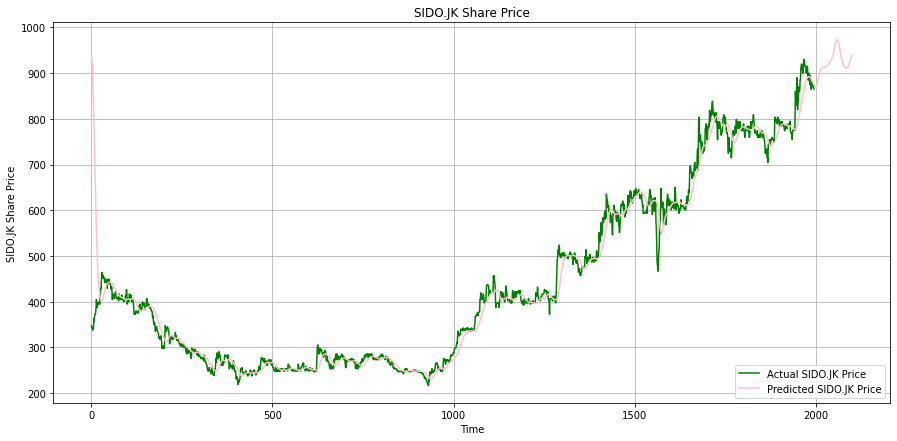

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company=str(input("Masukan Ticker saham yang ingin dianalisis program, sebagai contoh (BBCA.JK): "))#'UNVR.JK'#atau SIDO.JK; BBCA.JK

#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

error_tolenransi=0.04#0.031983333

status_punya_saham=str(input("Apakah anda sedang 'tidak' memiliki saham atau 'ingin membeli' saham baru? Jawab dengan ya/tidak: "))
if status_punya_saham=="ya":
  punya_saham=0
else:
  punya_saham=1

kasus_pajak_beli=str(input("Apakah anda menginginkan 'ongkos beli' (pajak beli) berbeda (bawaan adalah 0.0019), jawab dengan ya/tidak: "))
if kasus_pajak_beli=="ya":
  pajak_beli=float(input("Masukan besarnya 'ongkos beli' (pajak beli) baru dengan decimal: "))
else:
  pajak_beli=0.0019

kasus_pajak_jual=str(input("Apakah anda menginginkan 'ongkos jual' (pajak jual) berbeda (bawaan adalah 0.0039), jawab dengan ya/tidak: "))
if kasus_pajak_jual=="ya":
  pajak_jual=float(input("Masukan besarnya 'ongkos jual' (pajak jual) baru dengan decimal: "))
else:
  pajak_jual=0.0039

list_banyak_error_toleransi=[0]

lompatan=1


harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]


while lompatan<11:
  end=dt.date.today()+dt.timedelta(days=lompatan)#Days bisa digant bersesuaian

  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size) #ini banyak hari untuk testing data
    #ini tadinya 60 hari


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=1, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction = model.predict(real_data)
  prediction = scaler.inverse_transform(prediction)
  print("Maka hasil forecasting saham untuk ke\t",dt.date.today()+dt.timedelta(days=lompatan),\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
        "\nDimana RMSEnya adalah:", rmse, "\n")
  
  data_close.loc[len(data_close.index)] = prediction #append hasil predict

  print(data_close.iloc[len(data_close.index)-2], f"harga saat hari ke: {lompatan-1}\n")
  print(data_close.iloc[len(data_close.index)-1], f"harga saat hari ke: {lompatan}\n")

  keadaan_saham_error=abs(data_close.iloc[len(data_close.index)-2] - data_close.iloc[len(data_close.index)-1])/data_close.iloc[len(data_close.index)-2]
  #harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]
  
  if punya_saham==0:
    if data_close.iloc[len(data_close.index)-2] < data_close.iloc[len(data_close.index)-1]:
      punya_saham=1
      harga_beli_saham=data_close.iloc[len(data_close.index)-2] + pajak_beli * data_close.iloc[len(data_close.index)-2]
      print(f"Beli saham pada hari ke {lompatan-1}, karena besok akan naik\n")
      print(f"Harga saham yang dibeli adalah {data_close.iloc[len(data_close.index)-2]}\n")

  if punya_saham==1:
    if lompatan==1:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham = data_close.iloc[len(data_close.index)-1] - pajak_jual * data_close.iloc[len(data_close.index)-1]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=lompatan+100
        
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")
      
      
    else:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham=data_close.iloc[len(data_close.index)-2] - pajak_jual * data_close.iloc[len(data_close.index)-2]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=lompatan+100
          
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

          
          #else:
            #print("Keadaan sedang merugi, tetapi masih dibawah batas toleransi pada hari prediksi ke: ", lompatan, "\n")
            #list_banyak_error_toleransi.append(1)
      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")

  #if sum(list_banyak_error_toleransi)>=2:
    #print("kejadian saham merugi sudah 2 kali, maka program stop dan disarankan untuk menjual pada hari ke: ",lompatan-2)
    #lompatan=100


  lompatan=lompatan+1

#Plotting test prediksinya dan eksaknya
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(actual_prices[:len(actual_prices)-(lompatan)], color="green", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="pink", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()



In [ ]:
actual_prices

array([347.34832763671875, 342.38623046875, 342.38623046875, ...,
       array([[926.7401]], dtype=float32),
       array([[935.2284]], dtype=float32),
       array([[950.30054]], dtype=float32)], dtype=object)

In [ ]:
company

'SIDO.JK'

In [ ]:
predicted_prices[len(predicted_prices)-5:]

array([[932.64325],
       [935.1478 ],
       [936.8356 ],
       [937.6922 ],
       [937.81036]], dtype=float32)

In [ ]:
len(actual_prices[:len(actual_prices)-(lompatan-100)+2])

2098

In [ ]:
actual_prices[:len(actual_prices)-(lompatan-100)+3]

array([347.34832763671875, 342.38623046875, 342.38623046875, ..., 975.0,
       975.0, array([[871.3399]], dtype=float32)], dtype=object)

In [ ]:
actual_prices[:len(actual_prices)-(lompatan-100)+4]

array([347.34832763671875, 342.38623046875, 342.38623046875, ..., 975.0,
       array([[871.3399]], dtype=float32),
       array([[926.7401]], dtype=float32)], dtype=object)

In [ ]:
actual_prices[:len(actual_prices)-(lompatan-100)+5]

array([347.34832763671875, 342.38623046875, 342.38623046875, ...,
       array([[871.3399]], dtype=float32),
       array([[926.7401]], dtype=float32),
       array([[935.2284]], dtype=float32)], dtype=object)

In [ ]:
data_close.loc[len(data_close.index)] = prediction

In [ ]:
np.append(predicted_prices_plot,[[1231231231]],axis=0)


array([[9.37384827e+02],
       [9.33317505e+02],
       [9.23967529e+02],
       ...,
       [9.29906067e+02],
       [9.32643250e+02],
       [1.23123123e+09]])

In [ ]:
len(actual_prices)

2102

In [ ]:
actual_prices[len(actual_prices)-lompatan+100:]

array([975.0, 975.0, array([[871.3399]], dtype=float32),
       array([[926.7401]], dtype=float32),
       array([[935.2284]], dtype=float32),
       array([[950.30054]], dtype=float32)], dtype=object)

In [ ]:
len(predicted_prices_plot)

2098

In [ ]:
for i in actual_prices[len(actual_prices)-(lompatan-100)+2:]:
  predicted_prices_plot=np.append(predicted_prices_plot,i,axis=0)
predicted_prices_plot

[[871.3399]]
[[926.7401]]
[[935.2284]]
[[950.30054]]


array([[937.3848 ],
       [933.3175 ],
       [923.9675 ],
       ...,
       [926.7401 ],
       [935.2284 ],
       [950.30054]], dtype=float32)

In [ ]:
predicted_prices_plot=predicted_prices[:len(predicted_prices)-(lompatan-100)+2]
predicted_prices_plot

array([[937.3848 ],
       [933.3175 ],
       [923.9675 ],
       ...,
       [927.02484],
       [929.90607],
       [932.64325]], dtype=float32)

Masukan Ticker saham yang ingin dianalisis program, sebagai contoh (BBCA.JK): SIDO.JK
[*********************100%***********************]  1 of 1 completed
Apakah anda sedang 'tidak' memiliki saham atau 'ingin membeli' saham baru? Jawab dengan ya/tidak: tidak
Apakah anda menginginkan 'ongkos beli' (pajak beli) berbeda (bawaan adalah 0.0019), jawab dengan ya/tidak: tidak
Apakah anda menginginkan 'ongkos jual' (pajak jual) berbeda (bawaan adalah 0.0039), jawab dengan ya/tidak: tidak
63/63 [==============================] - 23s 206ms/step - loss: 0.0142
Maka hasil forecasting saham untuk ke	 2022-06-14 	adalah: 
ini adalah hasil prediksinya [[932.8364]] 
Dimana RMSEnya adalah: 45.3557323220181 

975.0 harga saat hari ke: 0

[[932.8364]] harga saat hari ke: 1

Saham merugi, tetapi saham tidak bisa dijual saat hari:  0 karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: 
 ini adalah nilai harga jual saham sete

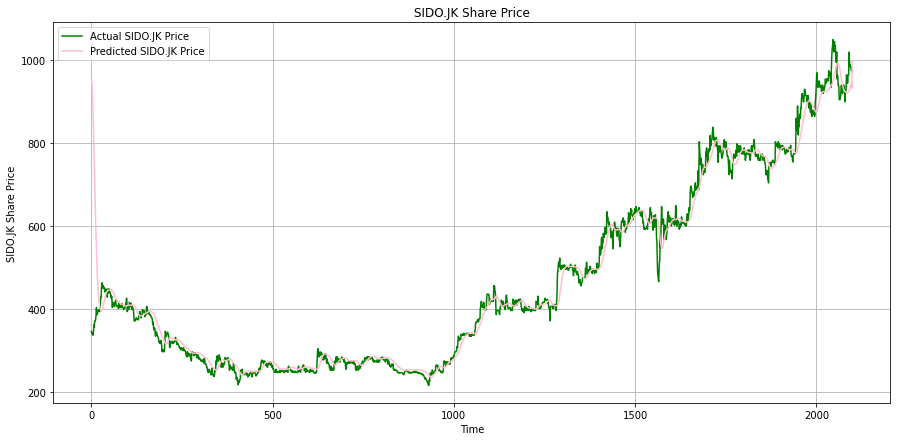

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company=str(input("Masukan Ticker saham yang ingin dianalisis program, sebagai contoh (BBCA.JK): "))#'UNVR.JK'#atau SIDO.JK; BBCA.JK

#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

error_tolenransi=0.04#0.031983333

status_punya_saham=str(input("Apakah anda sedang 'tidak' memiliki saham atau 'ingin membeli' saham baru? Jawab dengan ya/tidak: "))
if status_punya_saham=="ya":
  punya_saham=0
else:
  punya_saham=1

kasus_pajak_beli=str(input("Apakah anda menginginkan 'ongkos beli' (pajak beli) berbeda (bawaan adalah 0.0019), jawab dengan ya/tidak: "))
if kasus_pajak_beli=="ya":
  pajak_beli=float(input("Masukan besarnya 'ongkos beli' (pajak beli) baru dengan decimal: "))
else:
  pajak_beli=0.0019

kasus_pajak_jual=str(input("Apakah anda menginginkan 'ongkos jual' (pajak jual) berbeda (bawaan adalah 0.0039), jawab dengan ya/tidak: "))
if kasus_pajak_jual=="ya":
  pajak_jual=float(input("Masukan besarnya 'ongkos jual' (pajak jual) baru dengan decimal: "))
else:
  pajak_jual=0.0039

list_banyak_error_toleransi=[0]

lompatan=1


harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]


while lompatan<11:
  end=dt.date.today()+dt.timedelta(days=lompatan)#Days bisa digant bersesuaian

  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size) #ini banyak hari untuk testing data
    #ini tadinya 60 hari


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=1, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction = model.predict(real_data)
  prediction = scaler.inverse_transform(prediction)
  print("Maka hasil forecasting saham untuk ke\t",dt.date.today()+dt.timedelta(days=lompatan),\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
        "\nDimana RMSEnya adalah:", rmse, "\n")
  
  data_close.loc[len(data_close.index)] = prediction #append hasil predict

  print(data_close.iloc[len(data_close.index)-2], f"harga saat hari ke: {lompatan-1}\n")
  print(data_close.iloc[len(data_close.index)-1], f"harga saat hari ke: {lompatan}\n")

  keadaan_saham_error=abs(data_close.iloc[len(data_close.index)-2] - data_close.iloc[len(data_close.index)-1])/data_close.iloc[len(data_close.index)-2]
  #harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]
  
  if punya_saham==0:
    if data_close.iloc[len(data_close.index)-2] < data_close.iloc[len(data_close.index)-1]:
      punya_saham=1
      harga_beli_saham=data_close.iloc[len(data_close.index)-2] + pajak_beli * data_close.iloc[len(data_close.index)-2]
      print(f"Beli saham pada hari ke {lompatan-1}, karena besok akan naik\n")
      print(f"Harga saham yang dibeli adalah {data_close.iloc[len(data_close.index)-2]}\n")

  if punya_saham==1:
    if lompatan==1:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham = data_close.iloc[len(data_close.index)-1] - pajak_jual * data_close.iloc[len(data_close.index)-1]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=lompatan+100
        
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")
      
      
    else:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham=data_close.iloc[len(data_close.index)-2] - pajak_jual * data_close.iloc[len(data_close.index)-2]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=lompatan+100
          
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

          
          #else:
            #print("Keadaan sedang merugi, tetapi masih dibawah batas toleransi pada hari prediksi ke: ", lompatan, "\n")
            #list_banyak_error_toleransi.append(1)
      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")

  #if sum(list_banyak_error_toleransi)>=2:
    #print("kejadian saham merugi sudah 2 kali, maka program stop dan disarankan untuk menjual pada hari ke: ",lompatan-2)
    #lompatan=100


  lompatan=lompatan+1
predicted_prices_plot=predicted_prices[:len(predicted_prices)-(lompatan-100)+2]
for i in actual_prices[len(actual_prices)-(lompatan-100)+2:]:
  predicted_prices_plot=np.append(predicted_prices_plot,i,axis=0)

#Plotting test prediksinya dan eksaknya
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(actual_prices[:len(actual_prices)-(lompatan-100)+2], color="green", label=f"Actual {company} Price")
plt.plot(predicted_prices_plot, color="pink", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()



Masukan Ticker saham yang ingin dianalisis program, sebagai contoh (BBCA.JK): BBCA.JK
[*********************100%***********************]  1 of 1 completed
Apakah anda sedang 'tidak' memiliki saham atau 'ingin membeli' saham baru? Jawab dengan ya/tidak: ya
Apakah anda menginginkan 'ongkos beli' (pajak beli) berbeda (bawaan adalah 0.0019), jawab dengan ya/tidak: ya
Masukan besarnya 'ongkos beli' (pajak beli) baru dengan decimal: 0.0019
Apakah anda menginginkan 'ongkos jual' (pajak jual) berbeda (bawaan adalah 0.0039), jawab dengan ya/tidak: tidak
78/78 [==============================] - 38s 298ms/step - loss: 0.0202
Maka hasil forecasting saham untuk ke	 2022-06-14 	adalah: 
ini adalah hasil prediksinya [[7342.2954]] 
Dimana RMSEnya adalah: 389.83058309964804 

7350.0 harga saat hari ke: 0

[[7342.2954]] harga saat hari ke: 1



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


78/78 [==============================] - 39s 306ms/step - loss: 0.0169
Maka hasil forecasting saham untuk ke	 2022-06-15 	adalah: 
ini adalah hasil prediksinya [[7554.848]] 
Dimana RMSEnya adalah: 400.57781811954743 

[[7342.2954]] harga saat hari ke: 1

[[7554.848]] harga saat hari ke: 2

Beli saham pada hari ke 1, karena besok akan naik

Harga saham yang dibeli adalah [[7342.2954]]

Saham dalam keadaan baik dan meningkat untuk hari prediksi ke:  2 



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


78/78 [==============================] - 38s 288ms/step - loss: 0.0191
Maka hasil forecasting saham untuk ke	 2022-06-16 	adalah: 
ini adalah hasil prediksinya [[7287.6265]] 
Dimana RMSEnya adalah: 399.10163522197877 

[[7554.848]] harga saat hari ke: 2

[[7287.6265]] harga saat hari ke: 3

Saham harus dijual saat hari:  2 karena besok akan jatuh 

Keuntungan yang akan didapat persatuan sahamnya sebesar:  [[169.13867]]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


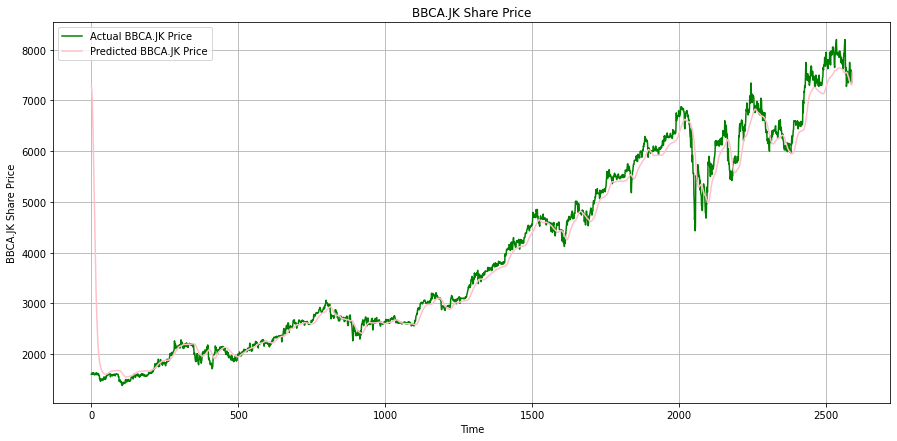

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company=str(input("Masukan Ticker saham yang ingin dianalisis program, sebagai contoh (BBCA.JK): "))#'UNVR.JK'#atau SIDO.JK; BBCA.JK

#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

error_tolenransi=0.04#0.031983333

status_punya_saham=str(input("Apakah anda sedang 'tidak' memiliki saham atau 'ingin membeli' saham baru? Jawab dengan ya/tidak: "))
if status_punya_saham=="ya":
  punya_saham=0
else:
  punya_saham=1

kasus_pajak_beli=str(input("Apakah anda menginginkan 'ongkos beli' (pajak beli) berbeda (bawaan adalah 0.0019), jawab dengan ya/tidak: "))
if kasus_pajak_beli=="ya":
  pajak_beli=float(input("Masukan besarnya 'ongkos beli' (pajak beli) baru dengan decimal: "))
else:
  pajak_beli=0.0019

kasus_pajak_jual=str(input("Apakah anda menginginkan 'ongkos jual' (pajak jual) berbeda (bawaan adalah 0.0039), jawab dengan ya/tidak: "))
if kasus_pajak_jual=="ya":
  pajak_jual=float(input("Masukan besarnya 'ongkos jual' (pajak jual) baru dengan decimal: "))
else:
  pajak_jual=0.0039

list_banyak_error_toleransi=[0]

lompatan=1


harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]


while lompatan<11:
  end=dt.date.today()+dt.timedelta(days=lompatan)#Days bisa digant bersesuaian

  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size) #ini banyak hari untuk testing data
    #ini tadinya 60 hari


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=1, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction = model.predict(real_data)
  prediction = scaler.inverse_transform(prediction)
  print("Maka hasil forecasting saham untuk ke\t",dt.date.today()+dt.timedelta(days=lompatan),\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
        "\nDimana RMSEnya adalah:", rmse, "\n")
  
  data_close.loc[len(data_close.index)] = prediction #append hasil predict

  print(data_close.iloc[len(data_close.index)-2], f"harga saat hari ke: {lompatan-1}\n")
  print(data_close.iloc[len(data_close.index)-1], f"harga saat hari ke: {lompatan}\n")

  keadaan_saham_error=abs(data_close.iloc[len(data_close.index)-2] - data_close.iloc[len(data_close.index)-1])/data_close.iloc[len(data_close.index)-2]
  #harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]
  
  if punya_saham==0:
    if data_close.iloc[len(data_close.index)-2] < data_close.iloc[len(data_close.index)-1]:
      punya_saham=1
      harga_beli_saham=data_close.iloc[len(data_close.index)-2] + pajak_beli * data_close.iloc[len(data_close.index)-2]
      print(f"Beli saham pada hari ke {lompatan-1}, karena besok akan naik\n")
      print(f"Harga saham yang dibeli adalah {data_close.iloc[len(data_close.index)-2]}\n")

  if punya_saham==1:
    if lompatan==1:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham = data_close.iloc[len(data_close.index)-1] - pajak_jual * data_close.iloc[len(data_close.index)-1]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=lompatan+100
        
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")
      
      
    else:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham=data_close.iloc[len(data_close.index)-2] - pajak_jual * data_close.iloc[len(data_close.index)-2]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=lompatan+100
          
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

          
          #else:
            #print("Keadaan sedang merugi, tetapi masih dibawah batas toleransi pada hari prediksi ke: ", lompatan, "\n")
            #list_banyak_error_toleransi.append(1)
      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")

  #if sum(list_banyak_error_toleransi)>=2:
    #print("kejadian saham merugi sudah 2 kali, maka program stop dan disarankan untuk menjual pada hari ke: ",lompatan-2)
    #lompatan=100


  lompatan=lompatan+1
predicted_prices_plot=predicted_prices[:len(predicted_prices)-(lompatan-100)+2]
for i in actual_prices[len(actual_prices)-(lompatan-100)+2:]:
  predicted_prices_plot=np.append(predicted_prices_plot,i,axis=0)

#Plotting test prediksinya dan eksaknya
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(actual_prices[:len(actual_prices)-(lompatan-100)+2], color="green", label=f"Actual {company} Price")
plt.plot(predicted_prices_plot, color="pink", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()



Masukan Ticker saham yang ingin dianalisis program, sebagai contoh (BBCA.JK): UNVR.JK
[*********************100%***********************]  1 of 1 completed
Apakah anda sedang 'tidak' memiliki saham atau 'ingin membeli' saham baru? Jawab dengan ya/tidak: ya
Apakah anda menginginkan 'ongkos beli' (pajak beli) berbeda (bawaan adalah 0.0019), jawab dengan ya/tidak: tidak
Apakah anda menginginkan 'ongkos jual' (pajak jual) berbeda (bawaan adalah 0.0039), jawab dengan ya/tidak: tidak
78/78 [==============================] - 29s 255ms/step - loss: 0.0178
Maka hasil forecasting saham untuk ke	 2022-06-14 	adalah: 
ini adalah hasil prediksinya [[4537.593]] 
Dimana RMSEnya adalah: 365.3113085653071 

4750.0 harga saat hari ke: 0

[[4537.593]] harga saat hari ke: 1

78/78 [==============================] - 18s 158ms/step - loss: 0.0231
Maka hasil forecasting saham untuk ke	 2022-06-15 	adalah: 
ini adalah hasil prediksinya [[4795.421]] 
Dimana RMSEnya adalah: 347.62721765609064 

[[4537.593]] harg

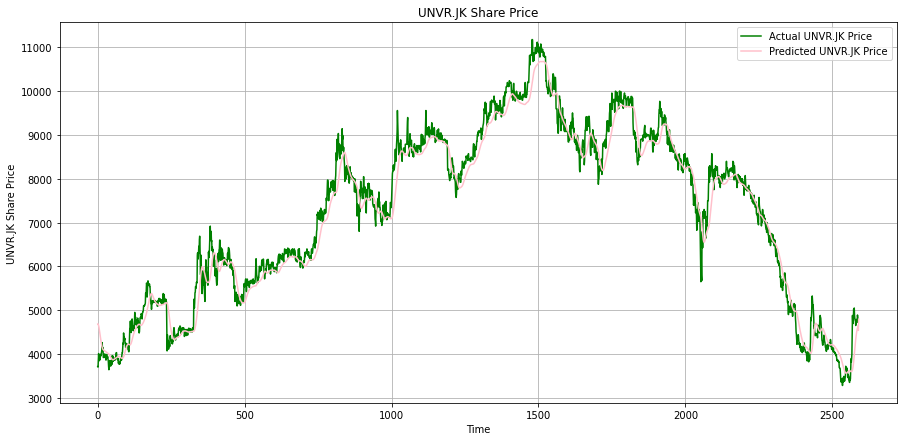

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error



#untuk load data saham (ticker)
company=str(input("Masukan Ticker saham yang ingin dianalisis program, sebagai contoh (BBCA.JK): "))#'UNVR.JK'#atau SIDO.JK; BBCA.JK

#Penentuan penanggalan mulai dan berakhir
start=dt.datetime(2012,1,1)
end=dt.date.today()

data = yf.download(company, start,end)
data = data.dropna()
data_close=data["Close"]

error_tolenransi=0.04#0.031983333

status_punya_saham=str(input("Apakah anda sedang 'tidak' memiliki saham atau 'ingin membeli' saham baru? Jawab dengan ya/tidak: "))
if status_punya_saham=="ya":
  punya_saham=0
else:
  punya_saham=1

kasus_pajak_beli=str(input("Apakah anda menginginkan 'ongkos beli' (pajak beli) berbeda (bawaan adalah 0.0019), jawab dengan ya/tidak: "))
if kasus_pajak_beli=="ya":
  pajak_beli=float(input("Masukan besarnya 'ongkos beli' (pajak beli) baru dengan decimal: "))
else:
  pajak_beli=0.0019

kasus_pajak_jual=str(input("Apakah anda menginginkan 'ongkos jual' (pajak jual) berbeda (bawaan adalah 0.0039), jawab dengan ya/tidak: "))
if kasus_pajak_jual=="ya":
  pajak_jual=float(input("Masukan besarnya 'ongkos jual' (pajak jual) baru dengan decimal: "))
else:
  pajak_jual=0.0039

list_banyak_error_toleransi=[0]

lompatan=1


harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]


while lompatan<11:
  end=dt.date.today()+dt.timedelta(days=lompatan)#Days bisa digant bersesuaian

  #mempersiapkan datanya
  scaler=MinMaxScaler(feature_range=(0,1)) #dia normalisasi data
  scaled_data=scaler.fit_transform(data_close.values.reshape(-1,1))

  #Prediksi forecasting berdasarkan 60 hari sebelumnya????
  prediction_days=round(4/100*data_close.size) #ini banyak hari untuk testing data
    #ini tadinya 60 hari


  #list untuk hasil training
  x_train=[]#kayaknya ini
  y_train=[]

  #kasus ini kenapa tidak pengambilan acak, karena kita mau belajar dari historisnya, buat prediksi si 60 hari itu nanti
  for x in range(prediction_days, len(scaled_data)):#ini x dari 120 sampai akhir ujung hasil minmax data close (2000an)
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train= np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


  #membuat model
  model=Sequential()

  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))                                    

  model.add(LSTM(units=50))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))#prediction untuk next closenya

  #============================================================        
  model.compile(optimizer="adam", loss= "mean_squared_error")
  model.fit(x_train, y_train, epochs=1, batch_size=32)#nanti epochs balikin ke 25


  #test model akurasi dari data yang dipunya
  #load test datanya
  #===================================================== ada catatan di bawah:
  test_data=data_close#yf.download(company, start,end)
  test_data=test_data.dropna()
  actual_prices=data_close.values

  #bagian concatnya keknya rada-rada...
  total_dataset=pd.concat((data_close, test_data), axis=0)

  #ada unsur kesengajaan di total_dataset, concatnya 2 hal yang sama...
  #beigtu juga pada model_inputs
  #dibagian total_dataset, langsung aja pake len(test_data)


  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values#yang dipake buat belajar?
  model_inputs = model_inputs.reshape(-1,1)
  model_inputs = scaler.transform(model_inputs)
  #=====================================================

  #hasil dari prediction dari test data
  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  rmse=np.sqrt(mean_squared_error(actual_prices,predicted_prices))
  #Memprediksi saham sekian hari kedepan
  real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1), 0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  prediction = model.predict(real_data)
  prediction = scaler.inverse_transform(prediction)
  print("Maka hasil forecasting saham untuk ke\t",dt.date.today()+dt.timedelta(days=lompatan),\
        "\tadalah:","\n" f"ini adalah hasil prediksinya {prediction}",\
        "\nDimana RMSEnya adalah:", rmse, "\n")
  
  data_close.loc[len(data_close.index)] = prediction #append hasil predict

  print(data_close.iloc[len(data_close.index)-2], f"harga saat hari ke: {lompatan-1}\n")
  print(data_close.iloc[len(data_close.index)-1], f"harga saat hari ke: {lompatan}\n")

  keadaan_saham_error=abs(data_close.iloc[len(data_close.index)-2] - data_close.iloc[len(data_close.index)-1])/data_close.iloc[len(data_close.index)-2]
  #harga_beli_saham=data_close.iloc[len(data_close.index)-1] + pajak_beli * data_close.iloc[len(data_close.index)-1]
  
  if punya_saham==0:
    if data_close.iloc[len(data_close.index)-2] < data_close.iloc[len(data_close.index)-1]:
      punya_saham=1
      harga_beli_saham=data_close.iloc[len(data_close.index)-2] + pajak_beli * data_close.iloc[len(data_close.index)-2]
      print(f"Beli saham pada hari ke {lompatan-1}, karena besok akan naik\n")
      print(f"Harga saham yang dibeli adalah {data_close.iloc[len(data_close.index)-2]}\n")

  if punya_saham==1:
    if lompatan==1:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham = data_close.iloc[len(data_close.index)-1] - pajak_jual * data_close.iloc[len(data_close.index)-1]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=lompatan+100
        
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")
      
      
    else:
      if data_close.iloc[len(data_close.index)-2] > data_close.iloc[len(data_close.index)-1]:
        #if keadaan_saham_error > error_tolenransi:
        harga_jual_saham=data_close.iloc[len(data_close.index)-2] - pajak_jual * data_close.iloc[len(data_close.index)-2]
        if harga_beli_saham < harga_jual_saham:      
          print("Saham harus dijual saat hari: ", lompatan-1, "karena besok akan jatuh \n")
          print("Keuntungan yang akan didapat persatuan sahamnya sebesar: ", harga_jual_saham - harga_beli_saham)
          lompatan=lompatan+100
          
        else:
          print("Saham merugi, tetapi saham tidak bisa dijual saat hari: ", lompatan-1, """karena tidak didapat keuntungan dari
          selisih harga jual saham dan harga beli saham setelah pajaknya 
          dengan nilai: \n""", f"ini adalah nilai harga jual saham setelah pajak: {harga_jual_saham}\n",\
          f"ini adalah nilai harga beli sahamnya setelah pajak: {harga_beli_saham}")

          
          #else:
            #print("Keadaan sedang merugi, tetapi masih dibawah batas toleransi pada hari prediksi ke: ", lompatan, "\n")
            #list_banyak_error_toleransi.append(1)
      else:
          #list_banyak_error_toleransi=[0]
        print("Saham dalam keadaan baik dan meningkat untuk hari prediksi ke: ", lompatan, "\n")

  #if sum(list_banyak_error_toleransi)>=2:
    #print("kejadian saham merugi sudah 2 kali, maka program stop dan disarankan untuk menjual pada hari ke: ",lompatan-2)
    #lompatan=100


  lompatan=lompatan+1
predicted_prices_plot=predicted_prices[:len(predicted_prices)-(lompatan-100)+2]
for i in actual_prices[len(actual_prices)-(lompatan-100)+2:]:
  predicted_prices_plot=np.append(predicted_prices_plot,i,axis=0)

#Plotting test prediksinya dan eksaknya
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(actual_prices[:len(actual_prices)-(lompatan-100)+2], color="green", label=f"Actual {company} Price")
plt.plot(predicted_prices_plot, color="pink", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

